In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from other_Methods_and_Classes import * #For testing multiple ML models
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, 
                              GradientBoostingRegressor)

# All references used in this project:

[Changing tile size on hist](https://stackoverflow.com/questions/46188580/pandas-dataframe-hist-change-title-size-on-subplot/46189639#46189639)

[Correlation Heatmap SNS](https://stackoverflow.com/questions/39409866/correlation-heatmap)

[Column Transformer](https://stackoverflow.com/questions/54345667/onehotencoder-categorical-features-depreciated-how-to-transform-specific-column)

[DengAI Benchmark](http://drivendata.co/blog/dengue-benchmark/)

[Object to Datetime](https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python)

[Drop Rows/Columns on a Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/)

[Seaborn Plotting](https://seaborn.pydata.org/index.html)

[Custom X ticks for a SNS Plot](https://stackoverflow.com/questions/43727278/how-to-set-readable-xticks-in-seaborns-facetgrid)

[Fix heatmap Plot](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

[Poisson Regression Model](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958)

[Negative Binomial Regression Model](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4)

[Class for testing multiple ML models](https://github.com/davidsbatista/machine-learning-notebooks/blob/master/hyperparameter-across-models.ipynb)

In [2]:
features_test = pd.read_csv('dengue_features_test.csv')
features_train = pd.read_csv('dengue_features_train.csv')
labels_train = pd.read_csv('dengue_labels_train.csv')

#### Looking at the data, and how it is labeled, I must apply Supervised Learning. For now I'll stick to logistic regression supervised learning. I might change my mind later since it might not be a linear model.

In [3]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [4]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
labels_train.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


In [6]:
labels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [7]:
#Contains all of the train related data (with their total cases)
train_concat = pd.concat([features_train, labels_train['total_cases']], sort=False, axis=1)

train_concat_copy = train_concat.copy()
#Filling with nans the coppied one
train_concat_copy.fillna(method='ffill', inplace=True)

train_concat_copy['set_type']='train'

features_test_copy = features_test.copy()

features_test_copy['set_type'] = 'test'

all_data = train_concat_copy.append(features_test_copy, sort=False)

all_data['week_start_date'] = pd.to_datetime(all_data['week_start_date'])

all_data['city']=all_data['city'].astype('category')

#putting all the data inside of a single dataframe

#imputer = SimpleImputer(missing_values =np.nan, strategy='mean')

#nan_labels= list(all_train.columns[4:-1])
#imputer=imputer.fit(all_train[nan_labels])

#all_train[nan_labels] = imputer.transform(all_train[nan_labels].values)

#filling missing data with means

In [8]:
train_concat.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [9]:
all_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,set_type
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,train


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 26 columns):
city                                     1872 non-null category
year                                     1872 non-null int64
weekofyear                               1872 non-null int64
week_start_date                          1872 non-null datetime64[ns]
ndvi_ne                                  1829 non-null float64
ndvi_nw                                  1861 non-null float64
ndvi_se                                  1871 non-null float64
ndvi_sw                                  1871 non-null float64
precipitation_amt_mm                     1870 non-null float64
reanalysis_air_temp_k                    1870 non-null float64
reanalysis_avg_temp_k                    1870 non-null float64
reanalysis_dew_point_temp_k              1870 non-null float64
reanalysis_max_air_temp_k                1870 non-null float64
reanalysis_min_air_temp_k                1870 non-null float64
reanalys

In [11]:
all_data.select_dtypes(include=[np.number]).drop(['year', 'weekofyear', 'total_cases'], axis = 1).columns.tolist()

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [12]:
#scaling some of the data for better performance
standardScaler = StandardScaler()

#selecting all numeric columns

scale_cols = all_data.select_dtypes(include=[np.number]).drop(['year', 'weekofyear', 'total_cases'], axis = 1).columns.tolist()

all_data[scale_cols] = standardScaler.fit_transform(all_data[scale_cols])

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 26 columns):
city                                     1872 non-null category
year                                     1872 non-null int64
weekofyear                               1872 non-null int64
week_start_date                          1872 non-null datetime64[ns]
ndvi_ne                                  1829 non-null float64
ndvi_nw                                  1861 non-null float64
ndvi_se                                  1871 non-null float64
ndvi_sw                                  1871 non-null float64
precipitation_amt_mm                     1870 non-null float64
reanalysis_air_temp_k                    1870 non-null float64
reanalysis_avg_temp_k                    1870 non-null float64
reanalysis_dew_point_temp_k              1870 non-null float64
reanalysis_max_air_temp_k                1870 non-null float64
reanalysis_min_air_temp_k                1870 non-null float64
reanalys

In [14]:
all_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,set_type
0,sj,1990,18,1990-04-30,-0.052787,-0.193201,-0.069609,-0.284390,-0.751345,-0.830624,...,-0.751345,-1.792727,-0.655061,-1.397955,-0.511905,-1.570015,-1.341639,-0.492457,4.0,train
1,sj,1990,19,1990-05-07,0.275463,0.115456,-0.548334,-0.543272,-0.504407,-0.370095,...,-0.504407,-0.913462,-0.727664,-0.398611,-0.752208,-0.391290,0.025756,-0.657262,5.0,train
2,sj,1990,20,1990-05-14,-0.679794,0.362636,-0.616673,-0.363628,-0.226128,0.040980,...,-0.226128,0.040614,-0.747831,-0.398611,-0.700251,-0.135046,0.398682,0.073226,4.0,train
3,sj,1990,21,1990-05-21,-0.010918,0.941419,0.315661,0.397224,-0.681538,0.189338,...,-0.681538,-0.072989,-0.711530,0.196504,-0.570357,0.428692,0.709453,-0.759708,3.0,train
4,sj,1990,22,1990-05-28,0.457978,1.078957,0.628964,0.531213,-0.867691,0.572597,...,-0.867691,0.274284,-0.546158,1.353048,0.611673,1.299923,1.082379,-0.719620,6.0,train


# Correlations from San Suan only (train data)

In [15]:
sj_train_data = all_data[(all_data['city']=='sj') & (all_data['set_type'] == 'train')]

sjcorr = sj_train_data.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

sjcorr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify()) #check other_Methods_and_Classes.py

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1,-0.073,-0.39,-0.5,0.0082,-0.081,0.039,0.19,0.19,0.02,0.18,0.11,-0.13,-0.28,0.039,0.023,0.33,-0.095,-0.28,-0.17,0.00075,0.085,-0.21
weekofyear,-0.073,1,-0.062,-0.035,-0.038,-0.074,0.24,0.57,0.55,0.57,0.51,0.57,0.25,0.31,0.24,0.58,-0.1,0.48,-0.14,0.32,0.52,0.21,0.29
ndvi_ne,-0.39,-0.062,1,0.61,0.21,0.16,-0.06,-0.082,-0.081,-0.054,-0.057,-0.091,-0.002,0.022,-0.06,-0.051,-0.019,0.056,0.19,0.1,0.0027,-0.084,0.0041
ndvi_nw,-0.5,-0.035,0.61,1,0.19,0.22,-0.042,-0.078,-0.076,-0.028,-0.045,-0.076,0.0046,0.072,-0.042,-0.023,-0.049,0.088,0.18,0.14,0.018,-0.083,0.059
ndvi_se,0.0082,-0.038,0.21,0.19,1,0.8,-0.11,-0.013,-0.01,-0.063,-0.0066,-0.047,-0.13,-0.12,-0.11,-0.058,0.041,-0.063,0.0053,-0.075,-0.072,-0.14,-0.12
ndvi_sw,-0.081,-0.074,0.16,0.22,0.8,1,-0.12,-0.039,-0.032,-0.082,-0.01,-0.068,-0.12,-0.11,-0.12,-0.075,0.052,-0.035,0.07,-0.01,-0.069,-0.17,0.041
precipitation_amt_mm,0.039,0.24,-0.06,-0.042,-0.11,-0.12,1,0.24,0.22,0.4,0.26,0.25,0.51,0.5,1,0.41,-0.093,0.2,-0.16,0.19,0.23,0.57,0.057
reanalysis_air_temp_k,0.19,0.57,-0.082,-0.078,-0.013,-0.039,0.24,1,1,0.9,0.94,0.94,0.08,0.3,0.24,0.91,0.18,0.88,0.042,0.7,0.83,0.12,0.18
reanalysis_avg_temp_k,0.19,0.55,-0.081,-0.076,-0.01,-0.032,0.22,1,1,0.9,0.94,0.94,0.063,0.29,0.22,0.9,0.2,0.88,0.056,0.7,0.83,0.099,0.17
reanalysis_dew_point_temp_k,0.02,0.57,-0.054,-0.028,-0.063,-0.082,0.4,0.9,0.9,1,0.85,0.9,0.33,0.68,0.4,1,-0.033,0.87,-0.055,0.69,0.85,0.29,0.2


In [71]:
sjcorr[['total_cases']].sort_values(by='total_cases', ascending=False)

,total_cases
total_cases,1.000000
weekofyear,0.287134
reanalysis_specific_humidity_g_per_kg,0.205338
reanalysis_dew_point_temp_k,0.201086
station_avg_temp_c,0.194126
reanalysis_max_air_temp_k,0.192635
station_max_temp_c,0.187544
reanalysis_min_air_temp_k,0.185525
reanalysis_air_temp_k,0.179402
station_min_temp_c,0.174285


(23.0, 0.0)

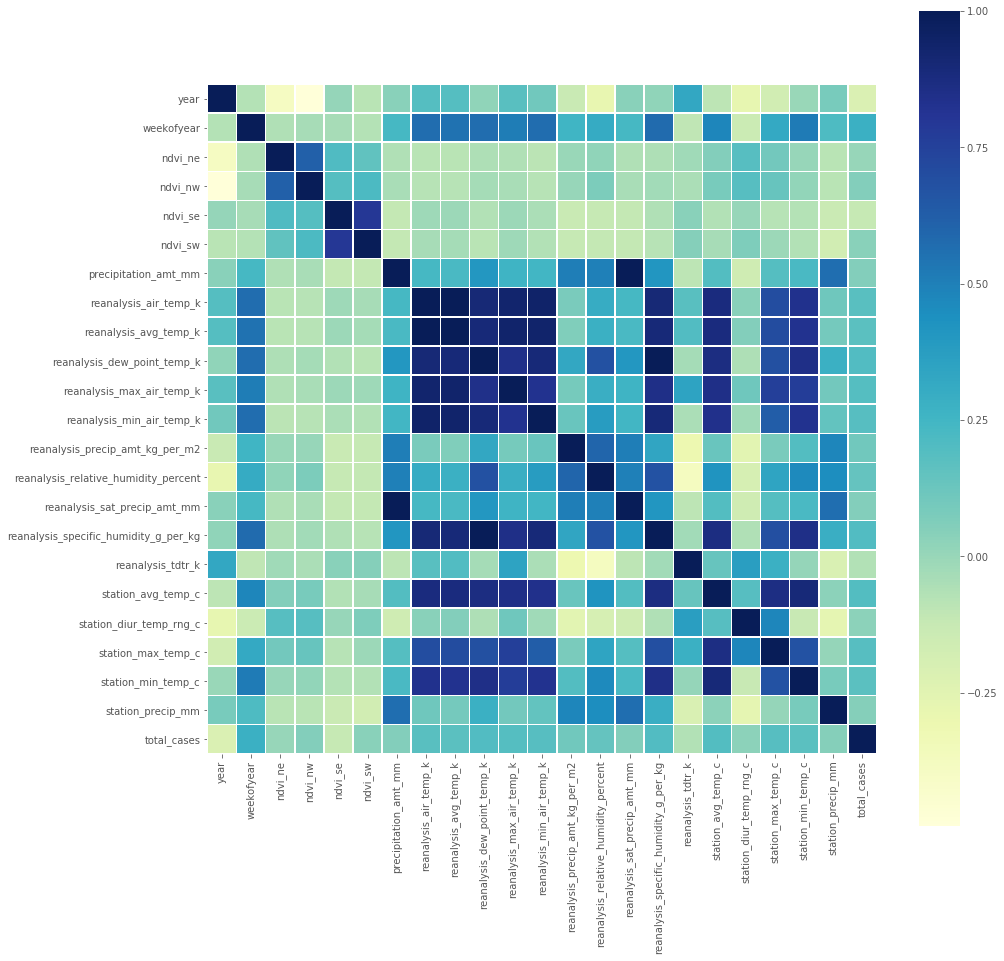

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,15))
g = sns.heatmap(sjcorr, ax=ax,cmap="YlGnBu", square=True, linewidths=.5)
bottom, top = g.get_ylim()

g.set_ylim(bottom+0.5,top-0.5) #this is a fix for the uncentered heatmap

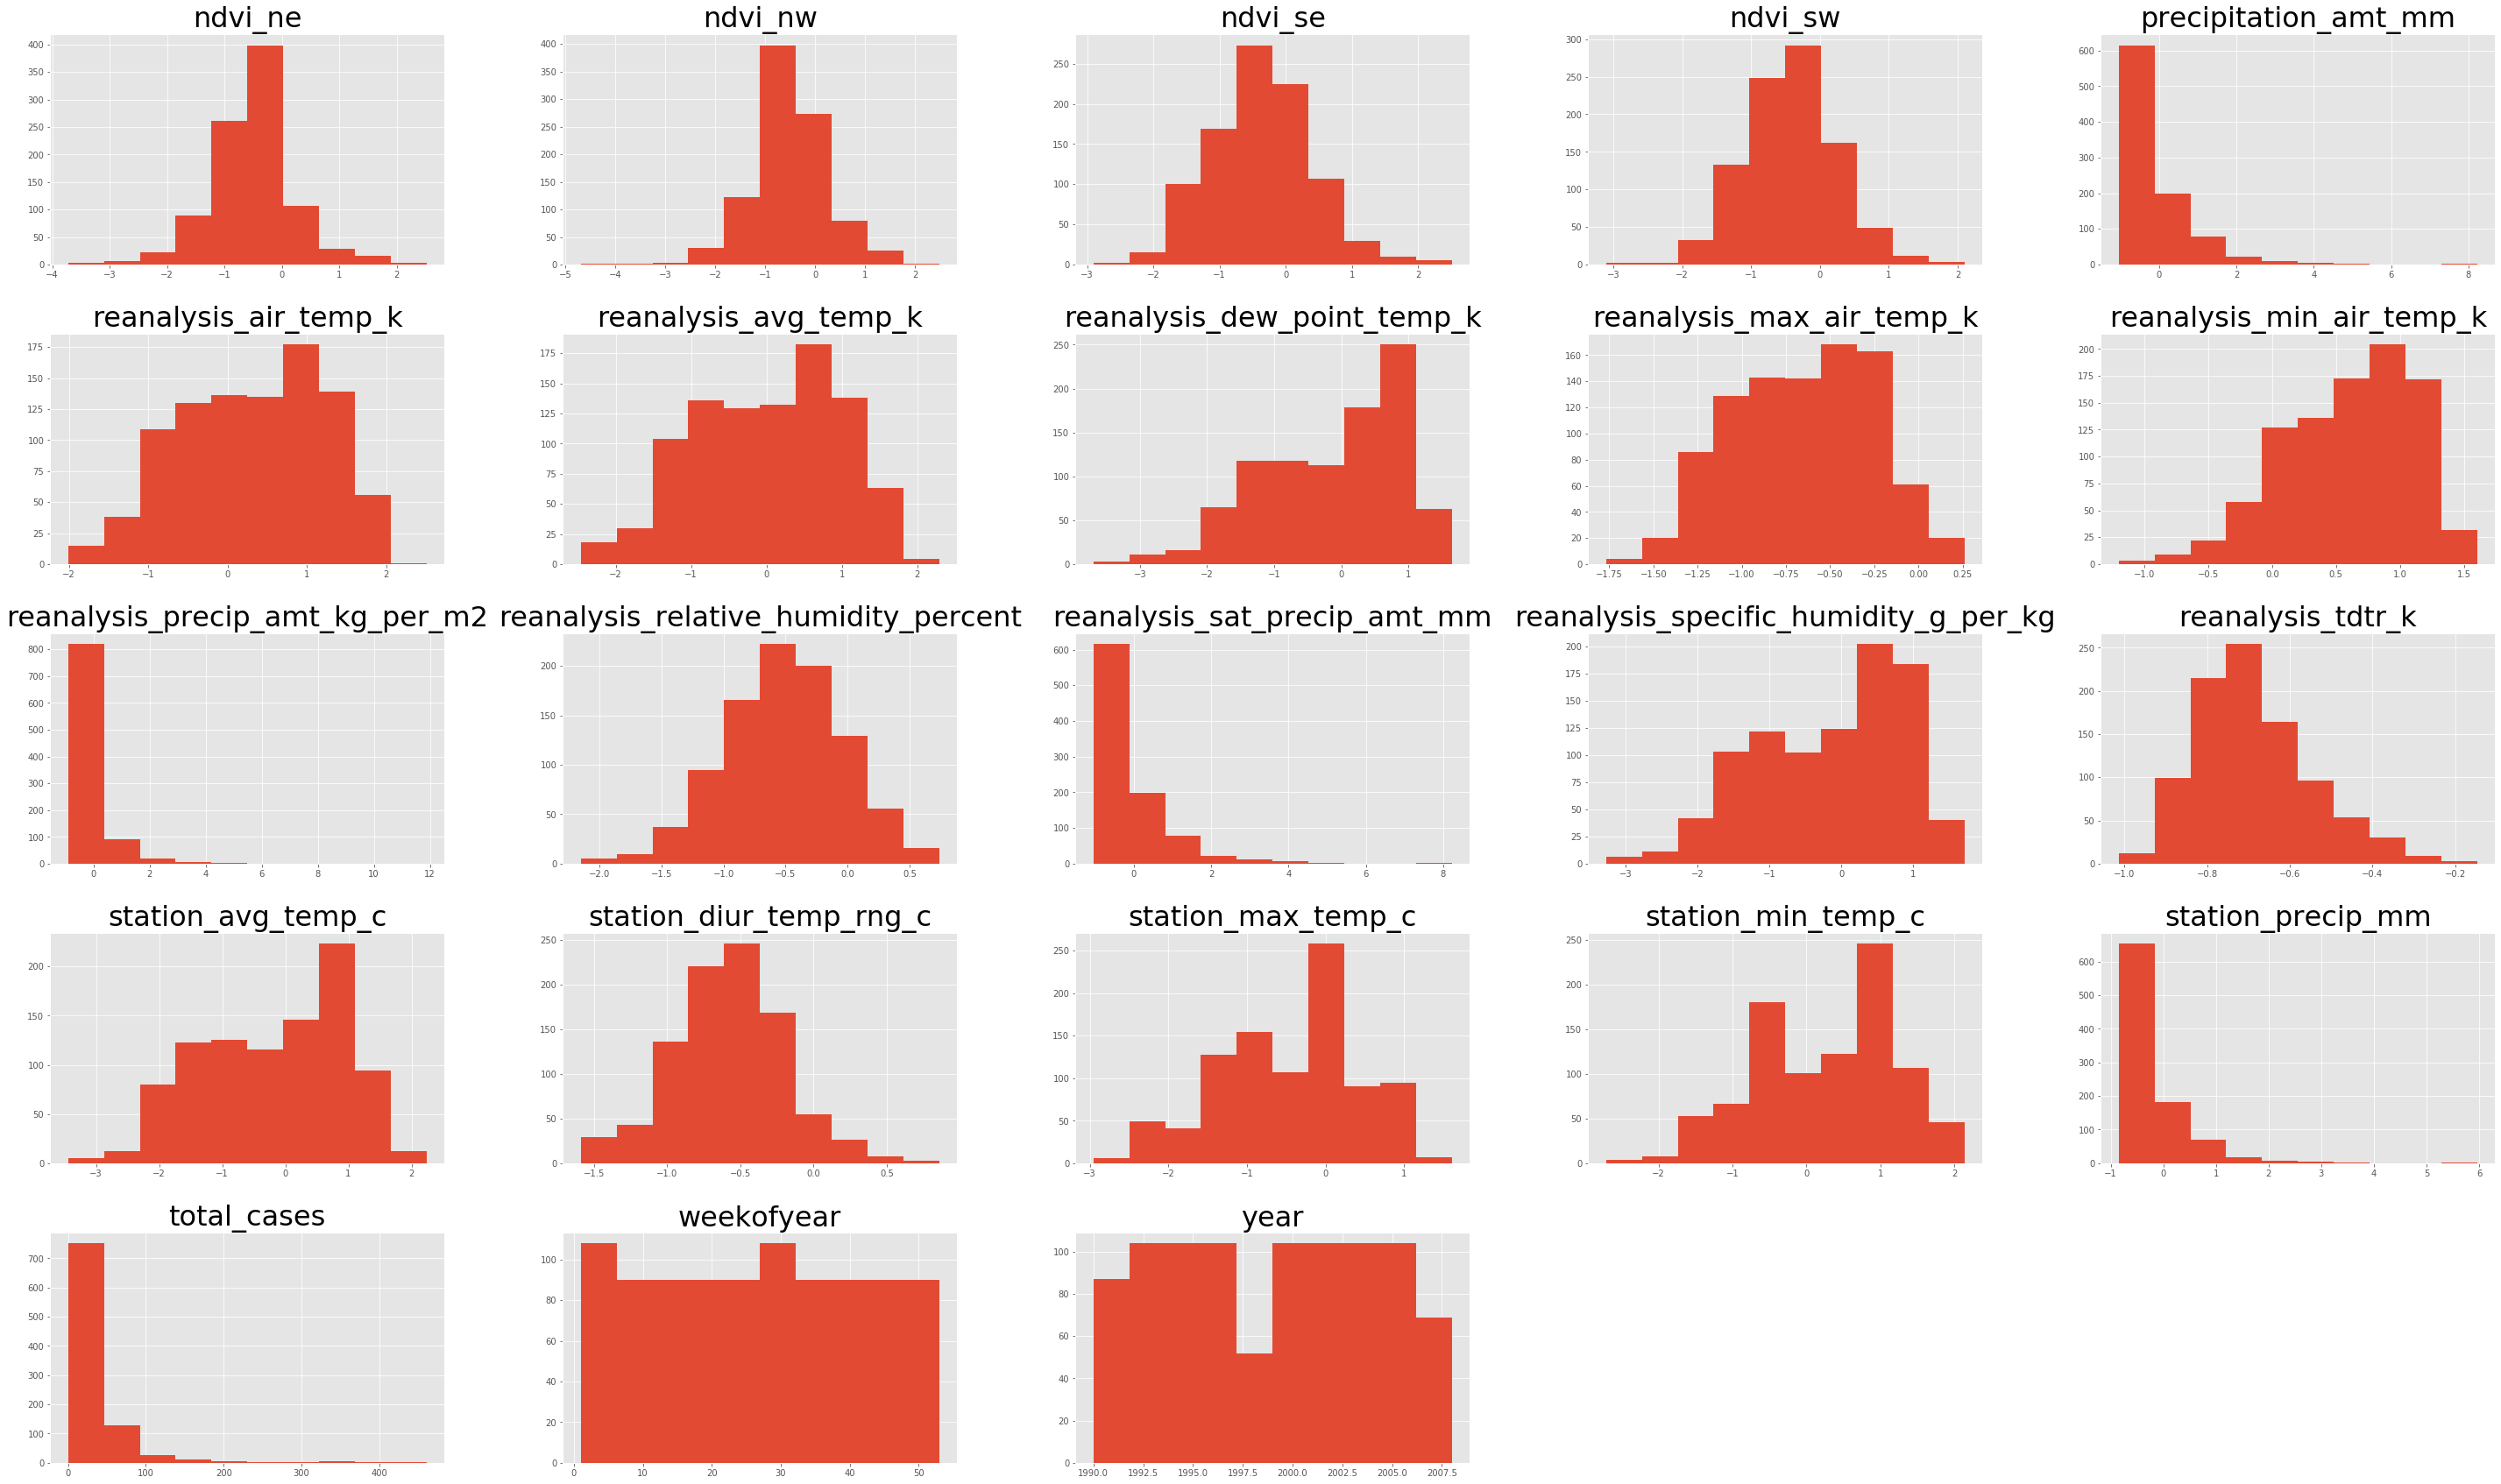

In [18]:
fig = sj_train_data.hist(figsize=(50,30))
[x.title.set_size(32) for x in fig.ravel()]
plt.show()

# Correlations from Iquitos only (train data)

In [19]:
iq_train_data = all_data[(all_data['city']=='iq')& (all_data['set_type'] == 'train')]

iqcorr = iq_train_data.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

iqcorr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1,-0.14,-0.061,0.034,-0.069,-0.013,0.087,0.026,0.008,0.32,-0.16,0.22,0.16,0.25,0.087,0.32,-0.24,0.081,-0.12,0.014,0.13,-0.035,0.18
weekofyear,-0.14,1,0.26,0.23,0.33,0.26,-0.1,0.29,0.3,-0.093,0.4,-0.026,-0.15,-0.28,-0.1,-0.083,0.35,0.084,0.22,0.19,-0.094,-0.045,-0.012
ndvi_ne,-0.061,0.26,1,0.76,0.77,0.84,-0.0086,0.15,0.17,-0.032,0.22,-0.0049,-0.084,-0.14,-0.0086,-0.031,0.17,0.12,0.15,0.14,-0.0078,0.011,0.02
ndvi_nw,0.034,0.23,0.76,1,0.65,0.77,-0.055,0.15,0.17,-0.033,0.2,0.0048,-0.077,-0.13,-0.055,-0.029,0.17,0.12,0.19,0.15,-0.09,-0.016,-0.011
ndvi_se,-0.069,0.33,0.77,0.65,1,0.71,-0.038,0.2,0.21,-0.061,0.26,-0.023,-0.12,-0.19,-0.038,-0.059,0.22,0.13,0.17,0.16,-0.051,0.012,-0.041
ndvi_sw,-0.013,0.26,0.84,0.77,0.71,1,-0.016,0.16,0.18,-0.03,0.23,-0.00024,-0.063,-0.14,-0.016,-0.027,0.17,0.12,0.17,0.17,-0.055,-0.0045,0.031
precipitation_amt_mm,0.087,-0.1,-0.0086,-0.055,-0.038,-0.016,1,-0.048,-0.054,0.47,-0.23,0.33,0.34,0.43,1,0.47,-0.38,0.13,-0.16,-0.0015,0.31,0.37,0.089
reanalysis_air_temp_k,0.026,0.29,0.15,0.15,0.2,0.16,-0.048,1,0.97,0.15,0.75,0.41,-0.087,-0.55,-0.048,0.18,0.55,0.59,0.51,0.65,0.24,-0.14,0.097
reanalysis_avg_temp_k,0.008,0.3,0.17,0.17,0.21,0.18,-0.054,0.97,1,0.14,0.78,0.39,-0.11,-0.54,-0.054,0.17,0.6,0.56,0.5,0.62,0.21,-0.14,0.08
reanalysis_dew_point_temp_k,0.32,-0.093,-0.032,-0.033,-0.061,-0.03,0.47,0.15,0.14,1,-0.26,0.76,0.57,0.74,0.47,1,-0.61,0.34,-0.23,0.095,0.62,0.18,0.23


In [72]:
iqcorr[['total_cases']].sort_values(by='total_cases', ascending=False)

,total_cases
total_cases,1.000000
reanalysis_specific_humidity_g_per_kg,0.234918
reanalysis_dew_point_temp_k,0.228864
reanalysis_min_air_temp_k,0.210854
station_min_temp_c,0.202844
year,0.179451
reanalysis_relative_humidity_percent,0.128548
station_avg_temp_c,0.114431
reanalysis_precip_amt_kg_per_m2,0.100686
reanalysis_air_temp_k,0.096666


(23.0, 0.0)

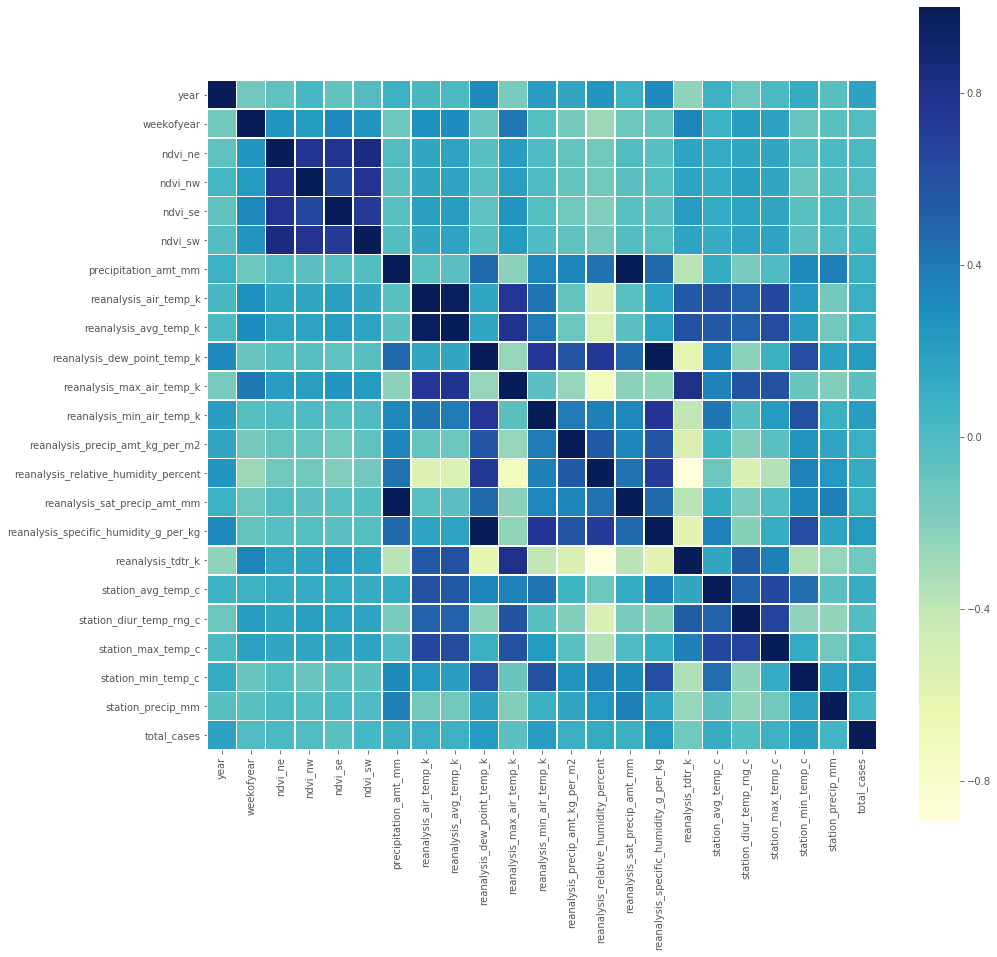

In [21]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,15))
g = sns.heatmap(iqcorr, ax=ax,cmap="YlGnBu", square=True, linewidths=.5)
bottom, top = g.get_ylim()

g.set_ylim(bottom+0.5,top-0.5) #this is a fix for the uncentered heatmap

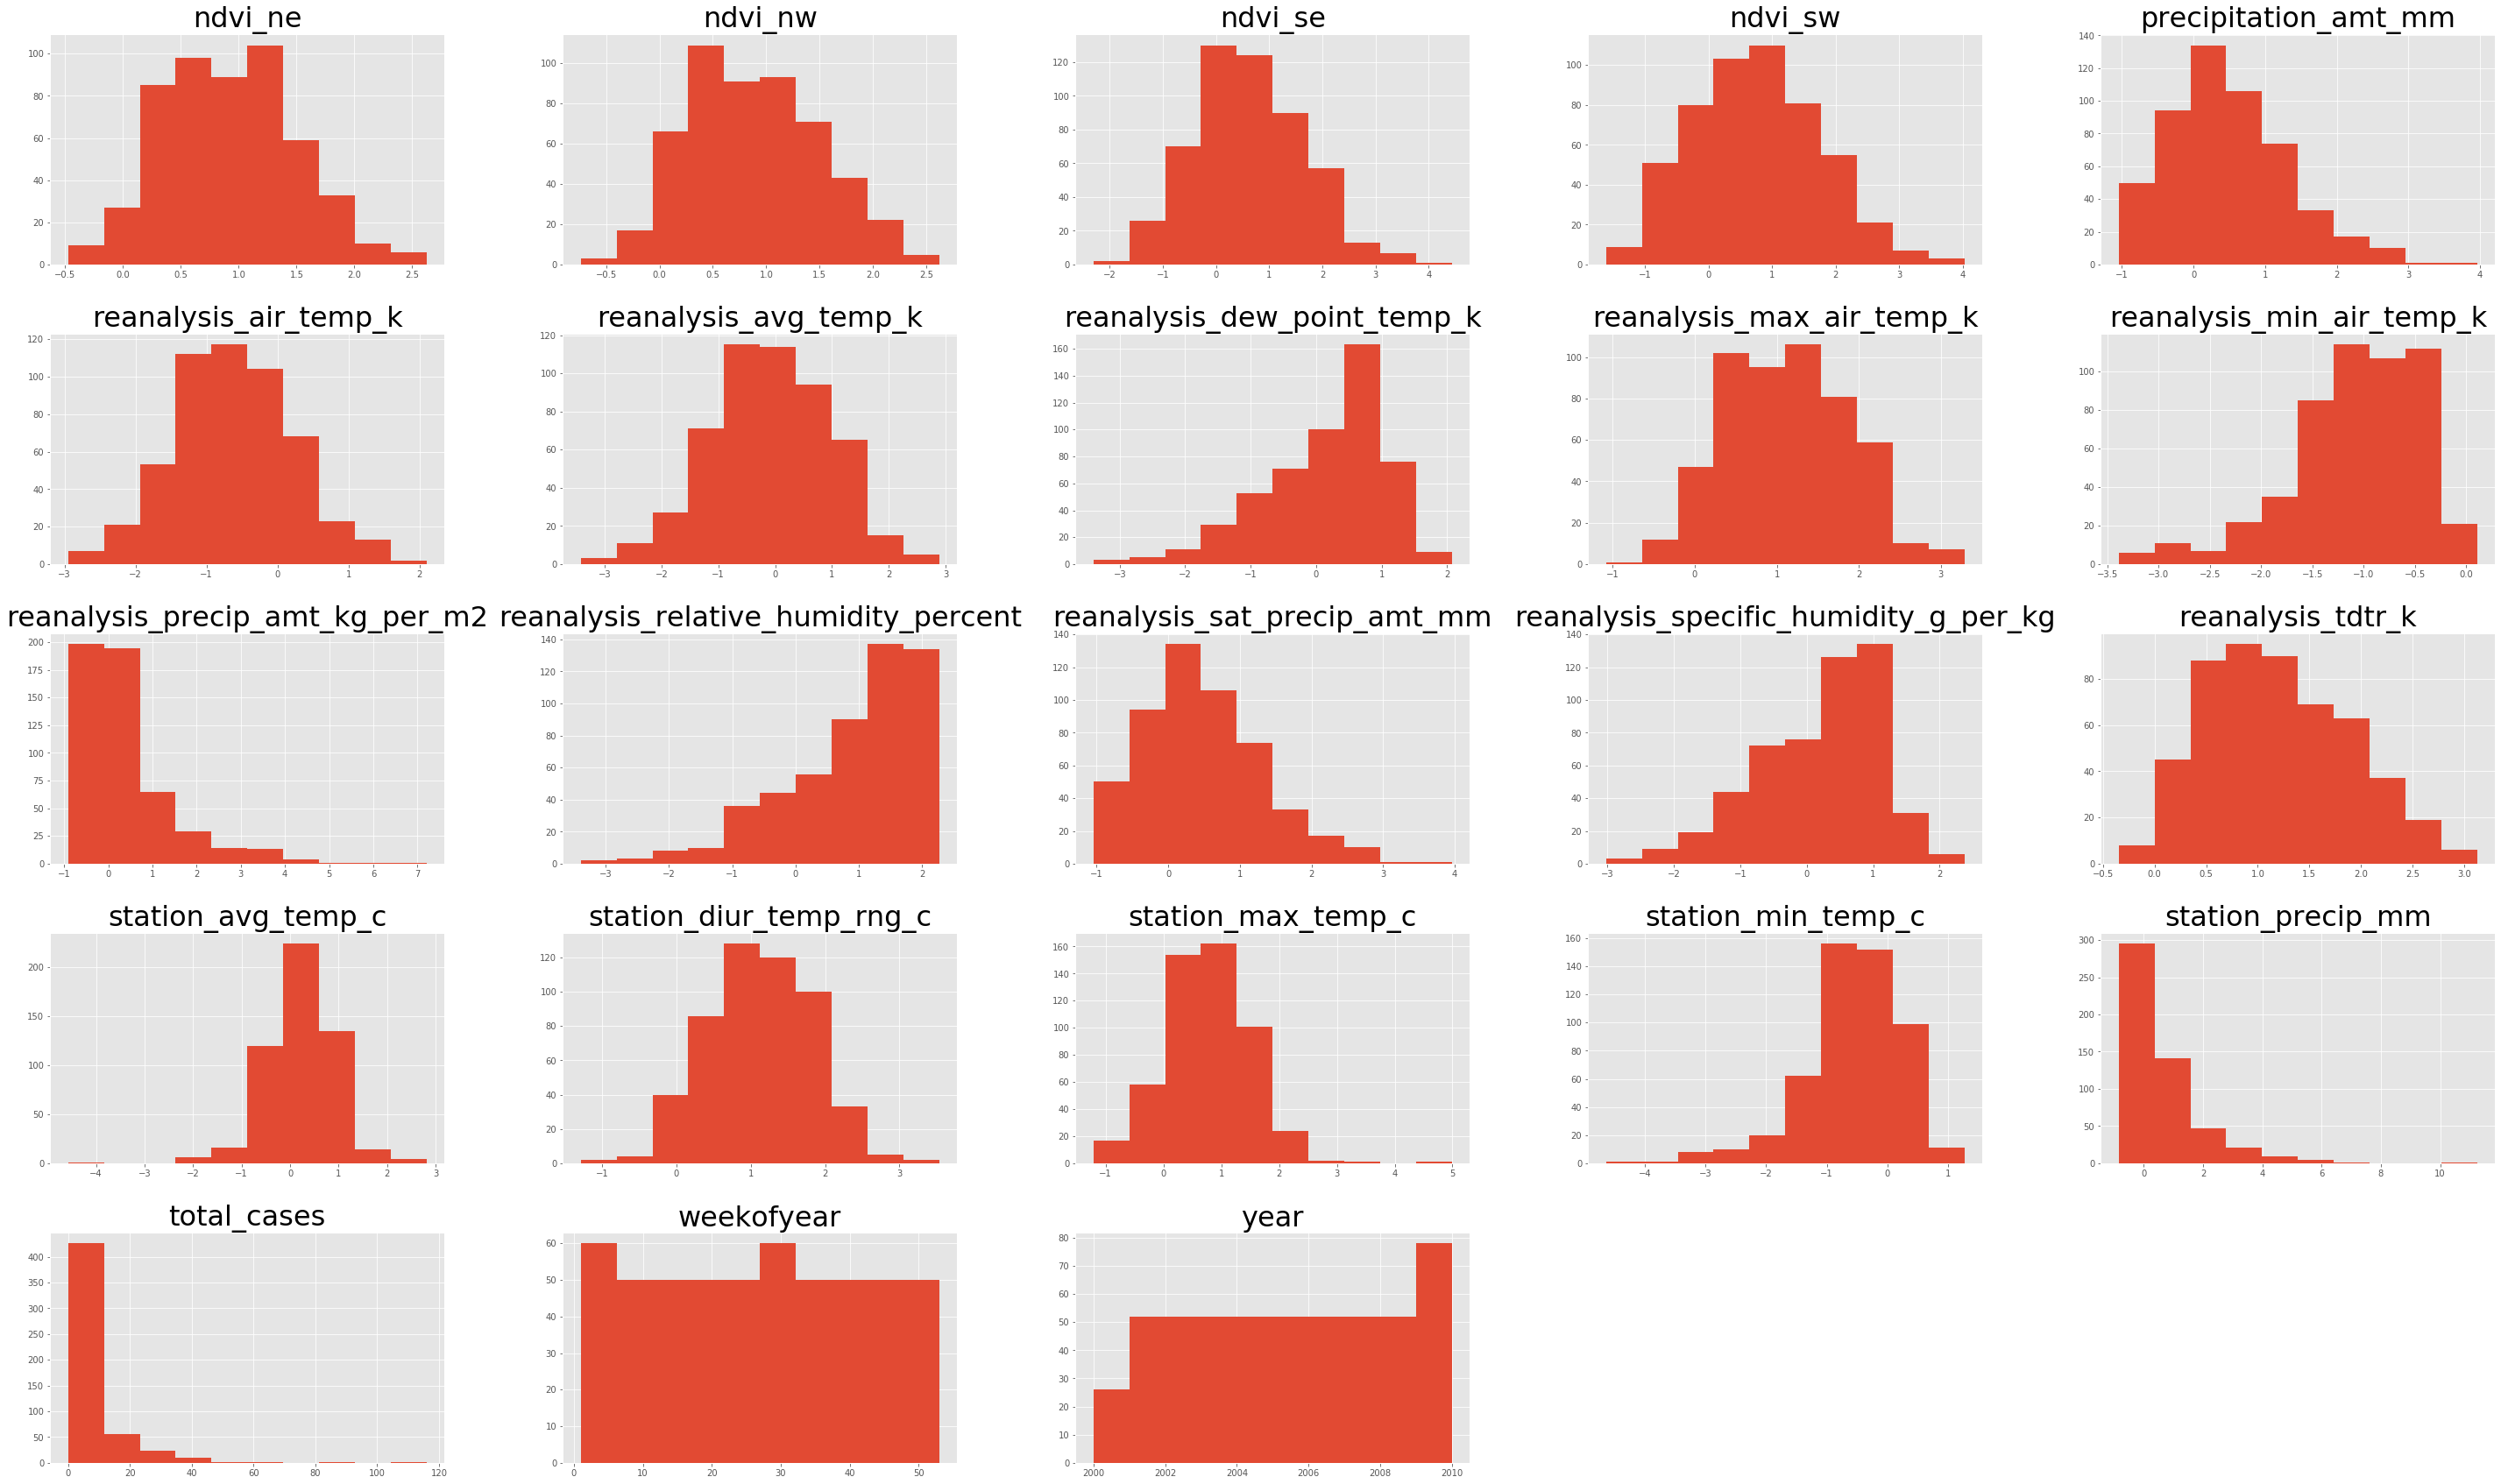

In [22]:
fig = iq_train_data.hist(figsize=(50,30))
[x.title.set_size(32) for x in fig.ravel()]
plt.show()

## Seeing here `total_cases`, there doesn't seem to be any strong corelations in the data.

## Both Iquitos and San Juan have highest corelation in `reanalysis_specific_humidity_g_per_kg`

#### This makes sense since mosquitos tend to reproduce on water/stuck water

# Regression Plot for both cities over all data

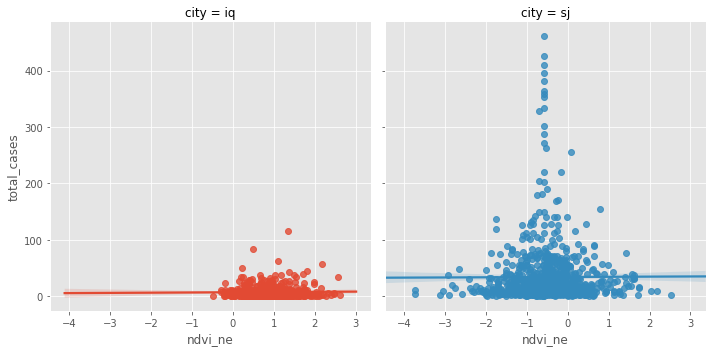

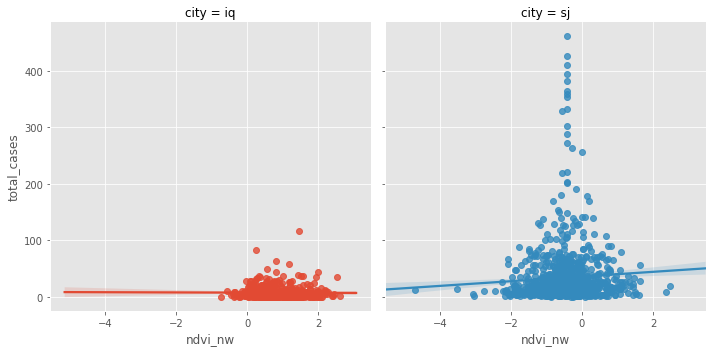

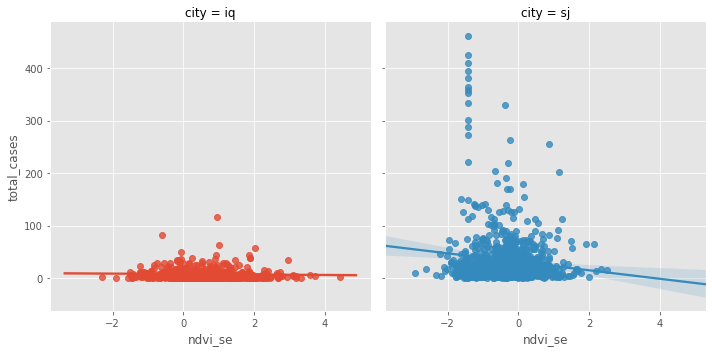

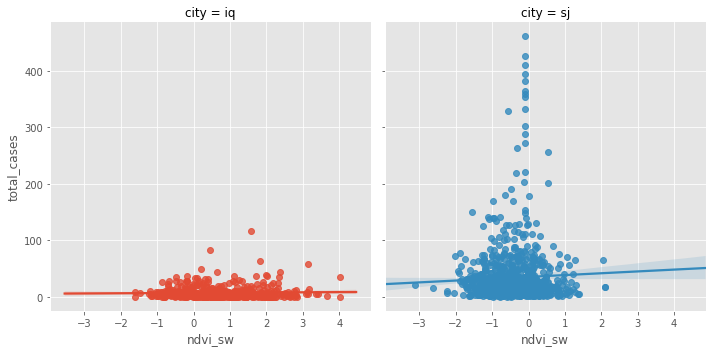

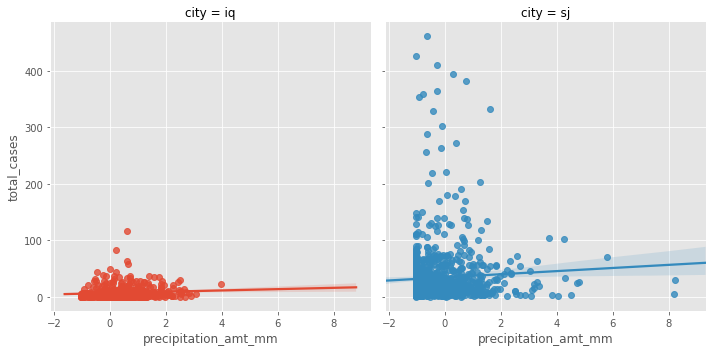

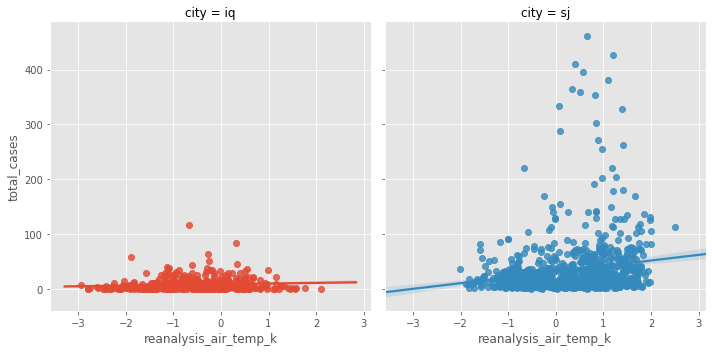

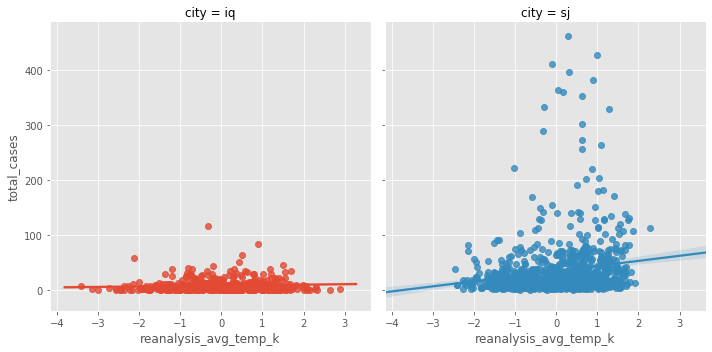

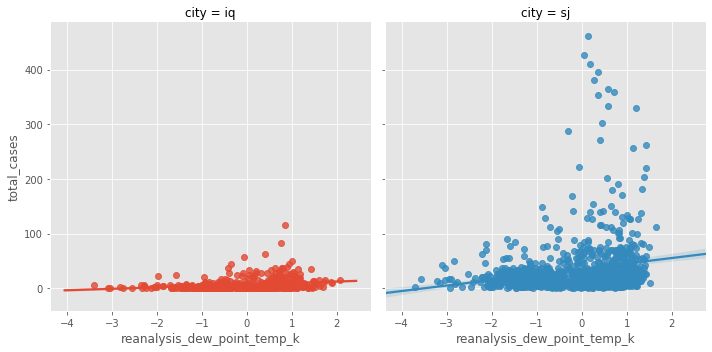

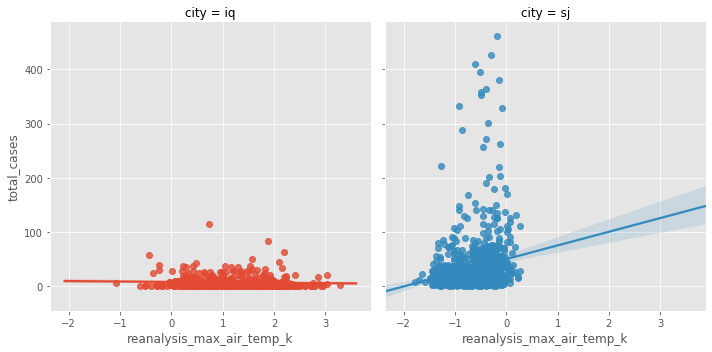

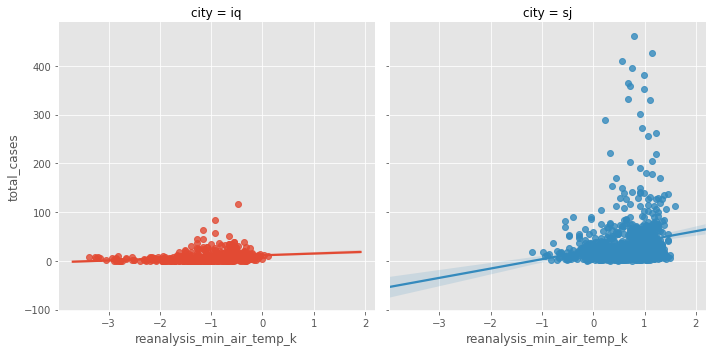

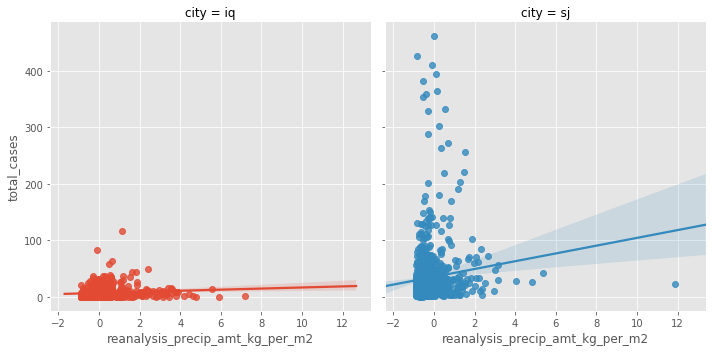

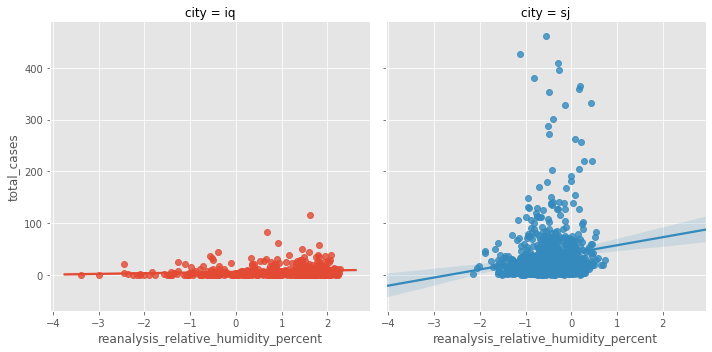

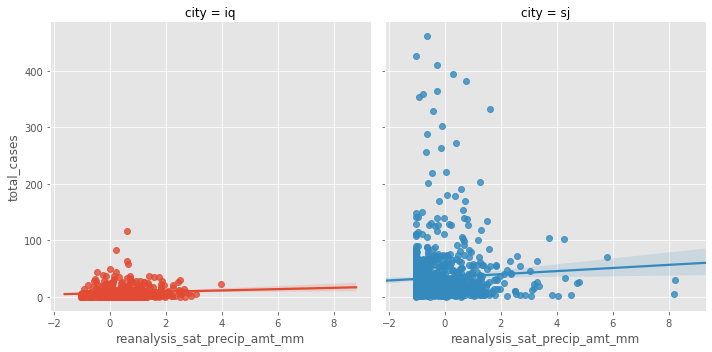

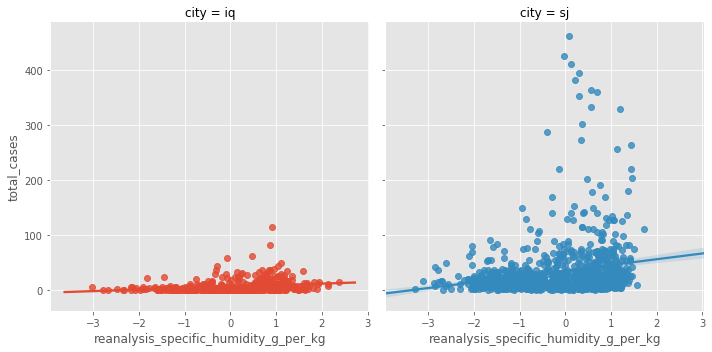

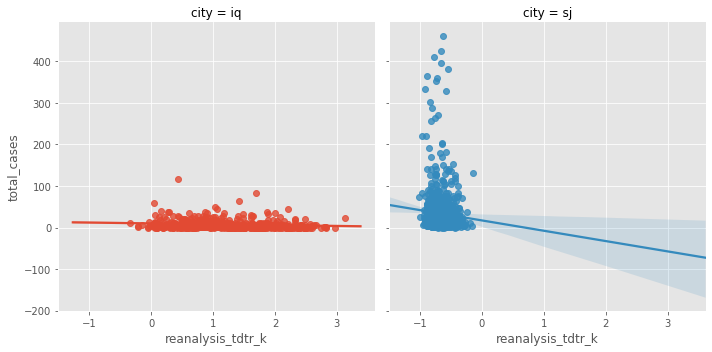

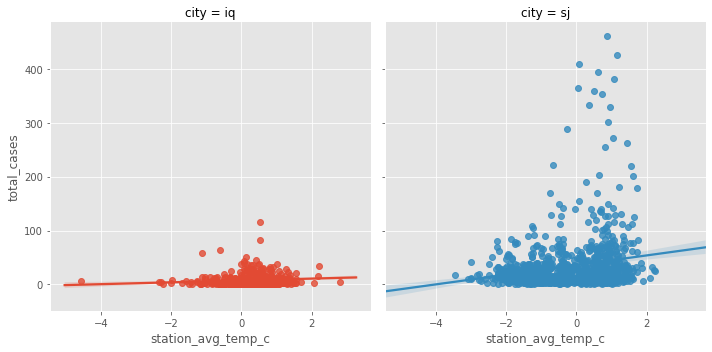

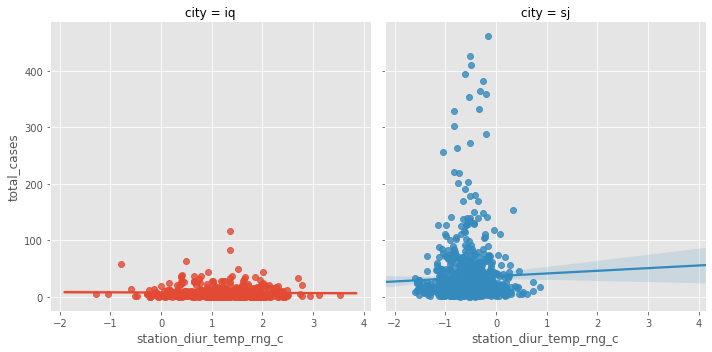

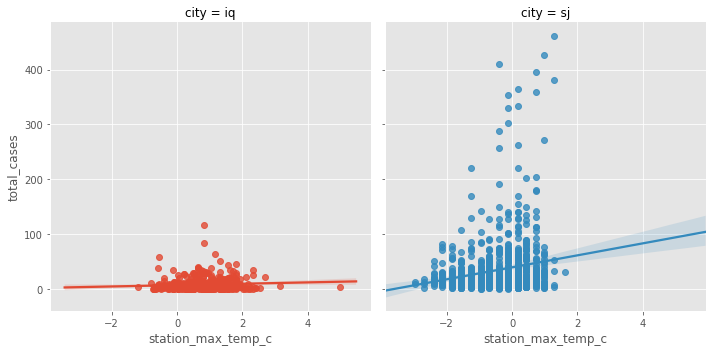

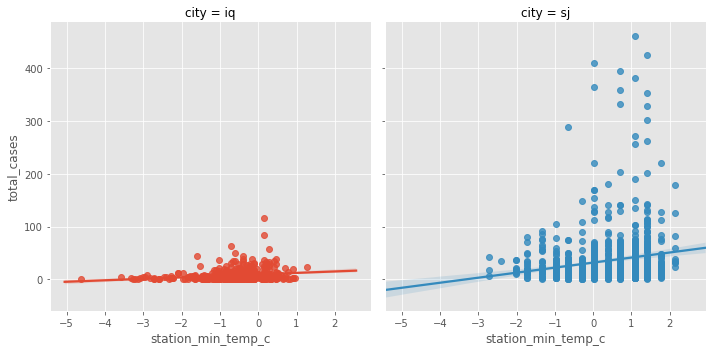

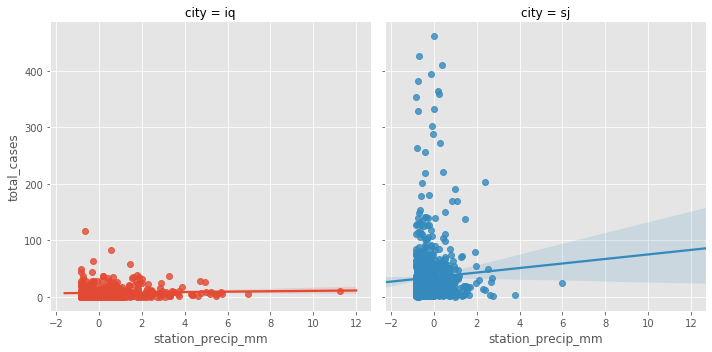

In [23]:
all_train_data = all_data[all_data['set_type'] == 'train']

#Grabbing only the numerical columns to iterate
colums_to_iter = all_train_data.columns[4:-2].values

#graphing a regression for all the data in both cities
for col in colums_to_iter:
    sns.lmplot(col,'total_cases',hue='city',col='city',
               data = all_train_data)    
    plt.show()

## Here one can see that San Juan has a higher corelation with the dataset (partly because it has more data to use).

In [24]:
#using datetime as index
date_all_train_data = all_train_data.set_index(all_train_data.week_start_date)

# Total Cases vs Time plot

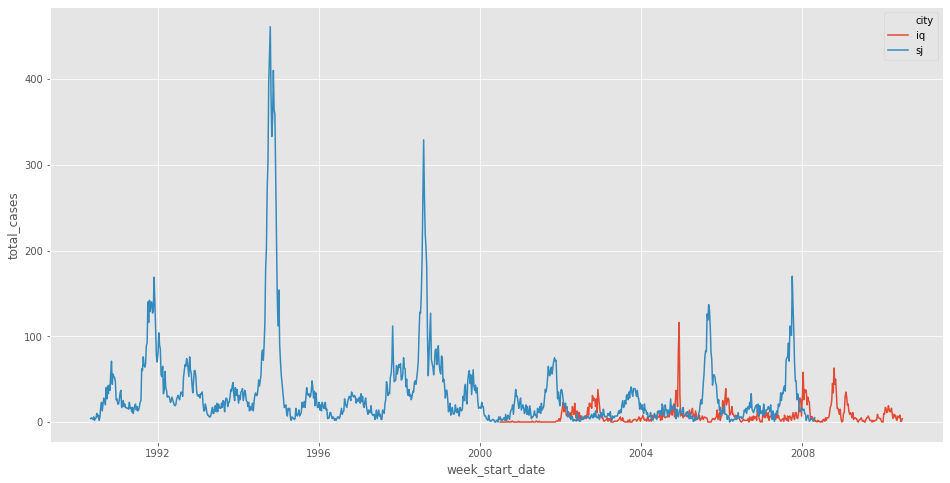

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot('week_start_date','total_cases',hue='city',data=all_train_data, ax=ax)

plt.show()

## It is visible how total cases spikes have decreased as time went going (which could be due to medical advancements). It is also visible that San Juan and Iquitos both have different spiking seasons. This must be true as not only are they at different locations this infection gets spread by people as well, not just mosquitos as a variable.

# Total Cases vs Year

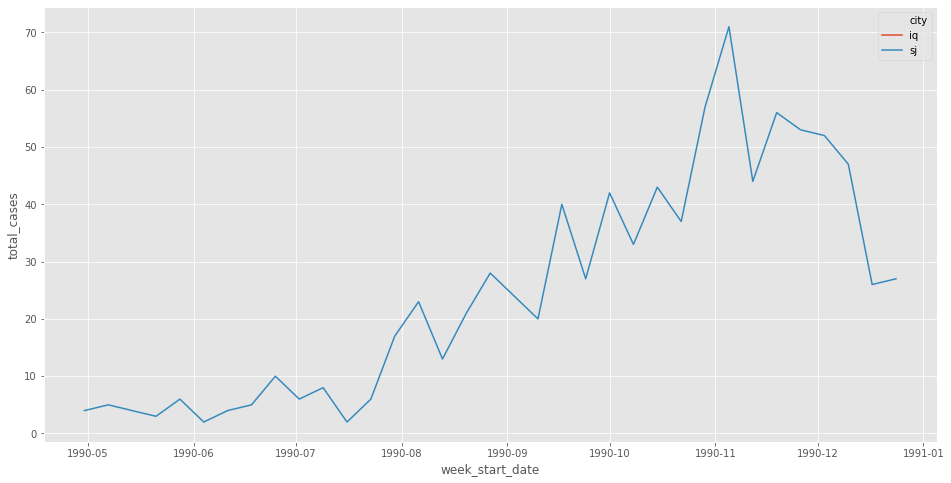

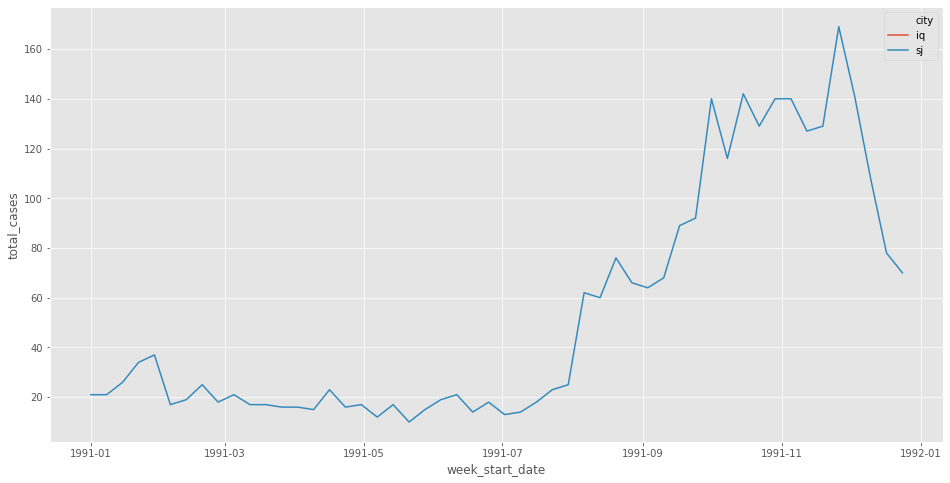

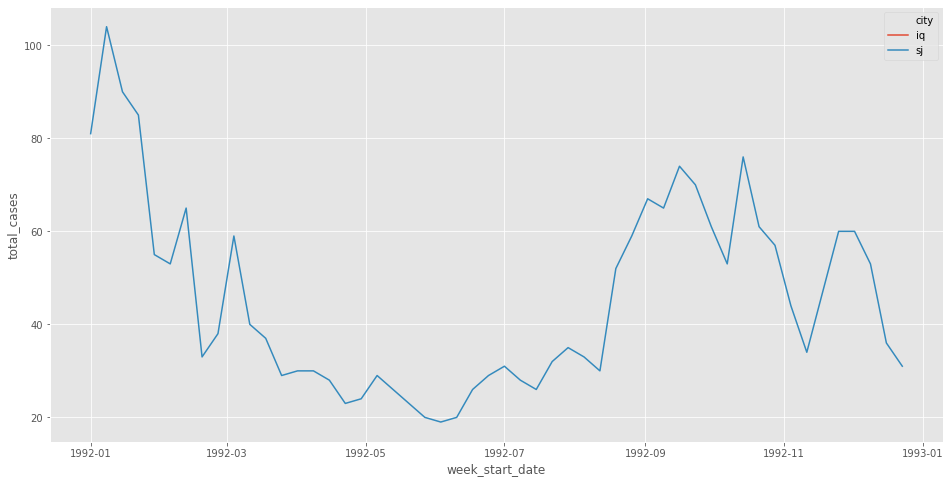

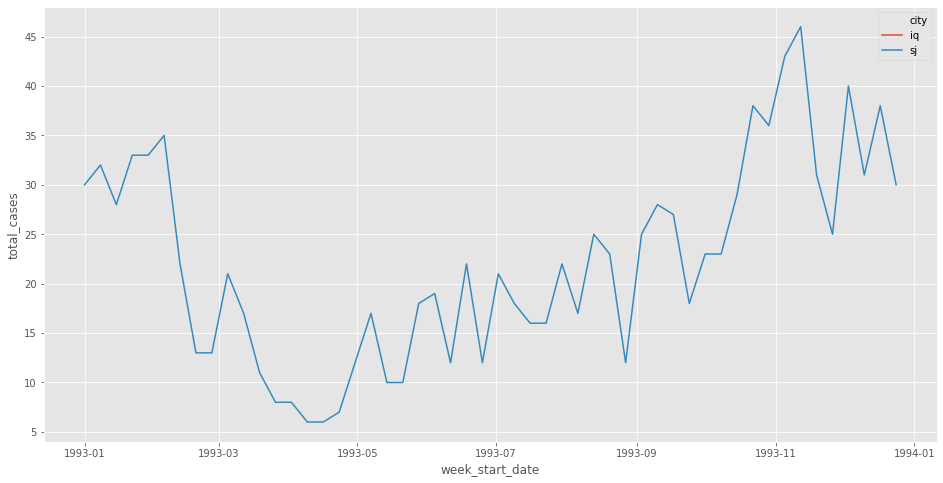

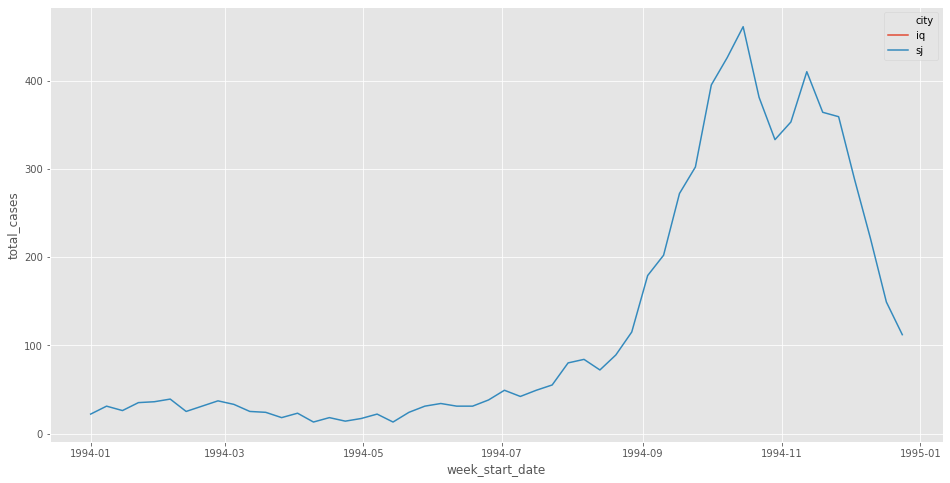

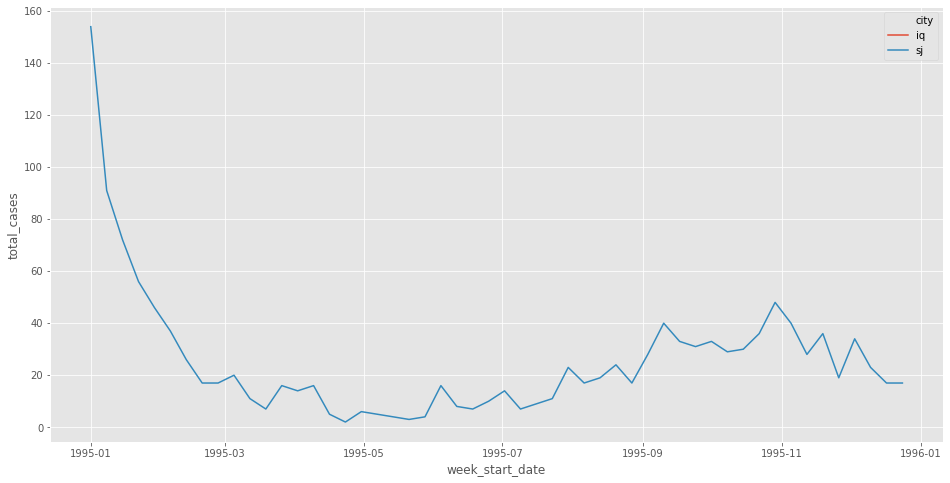

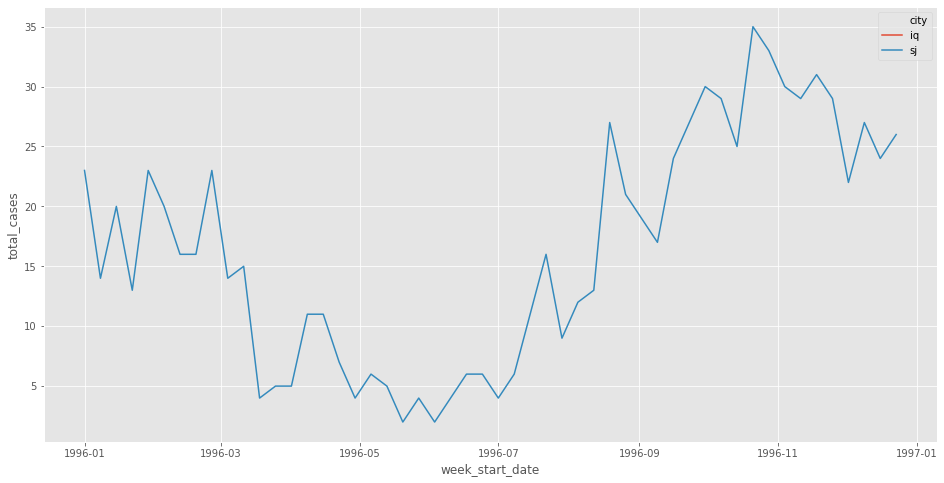

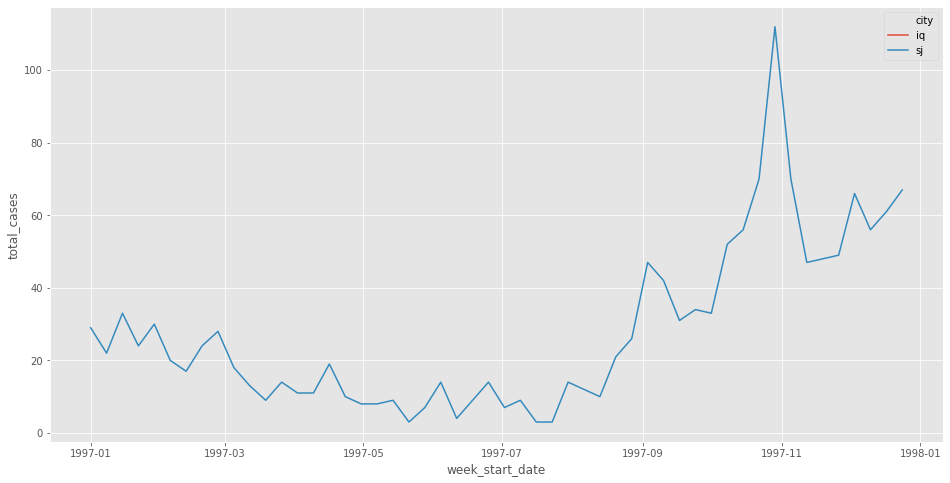

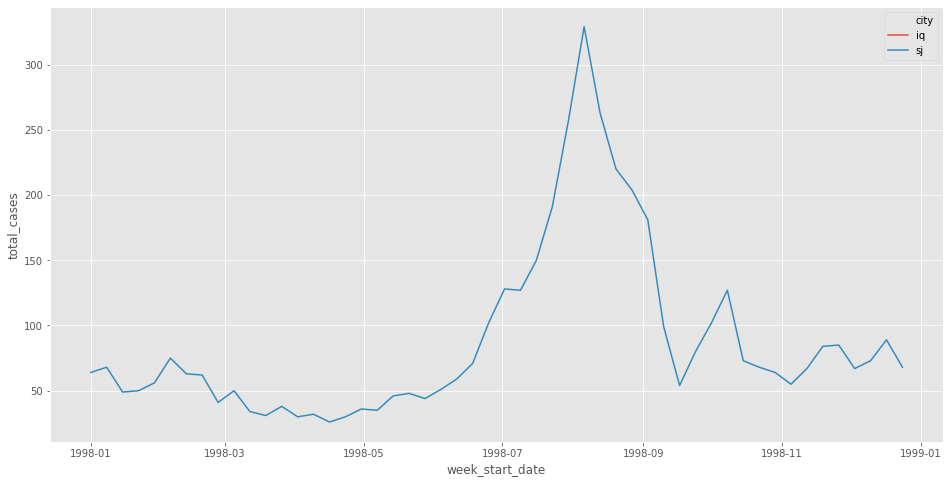

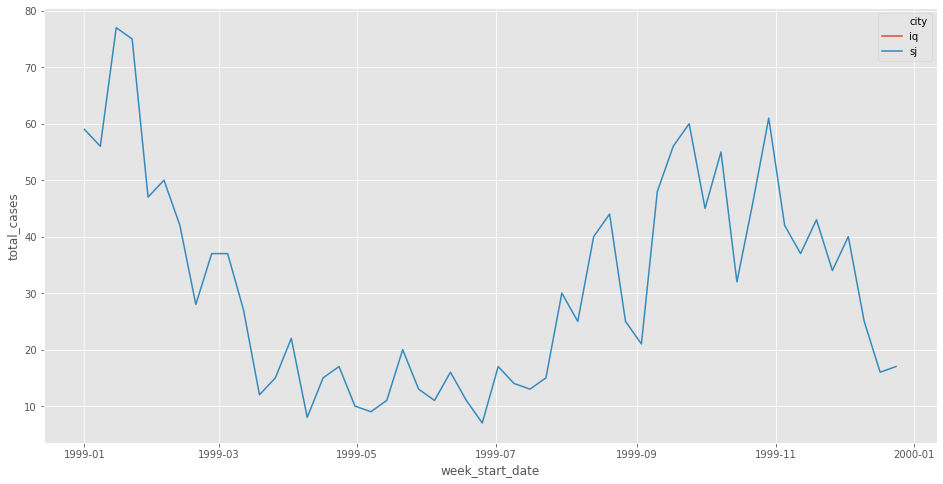

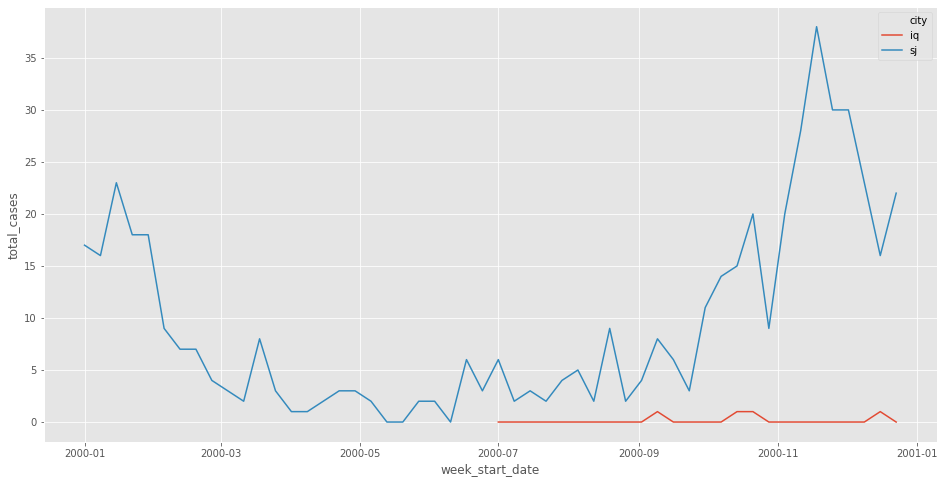

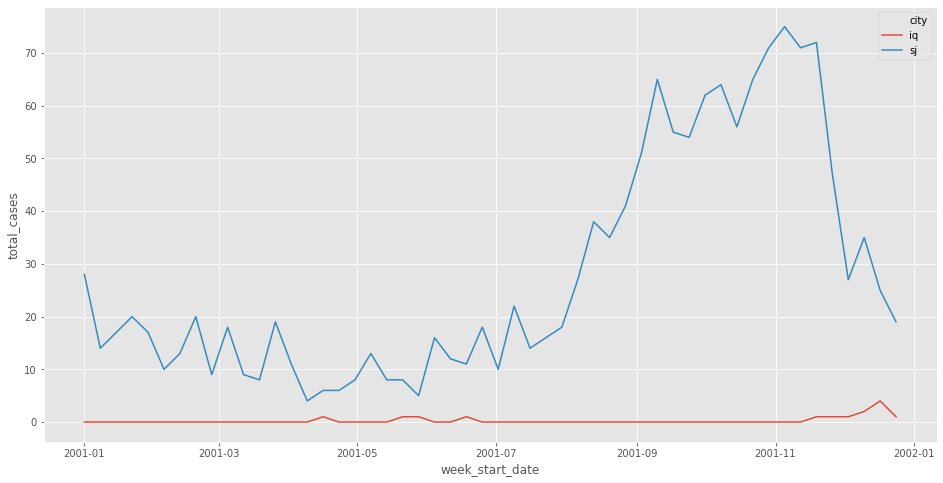

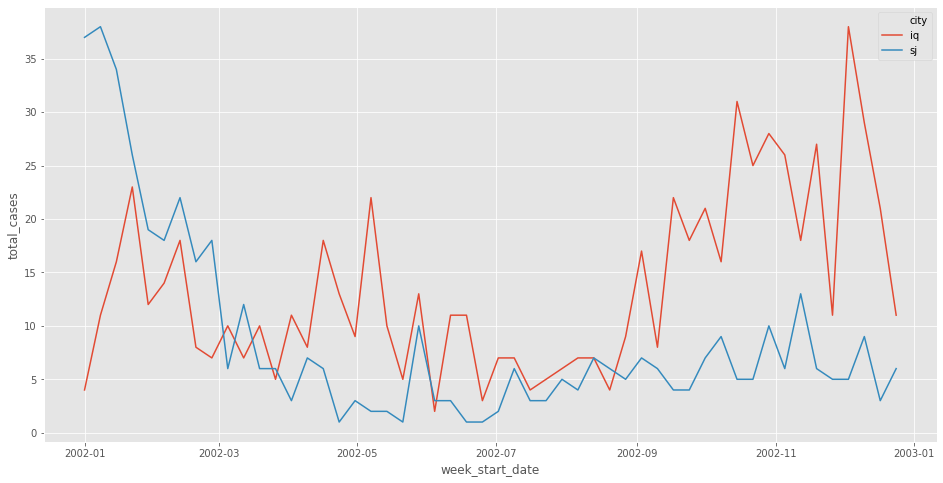

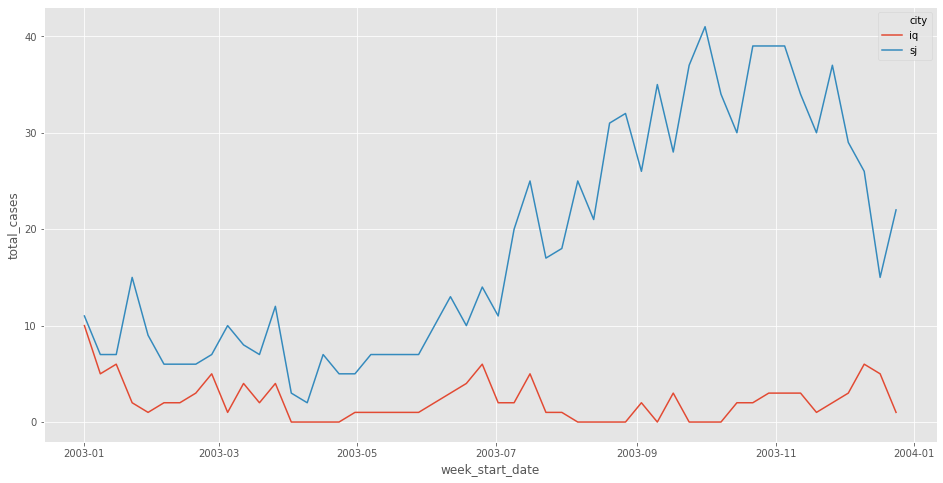

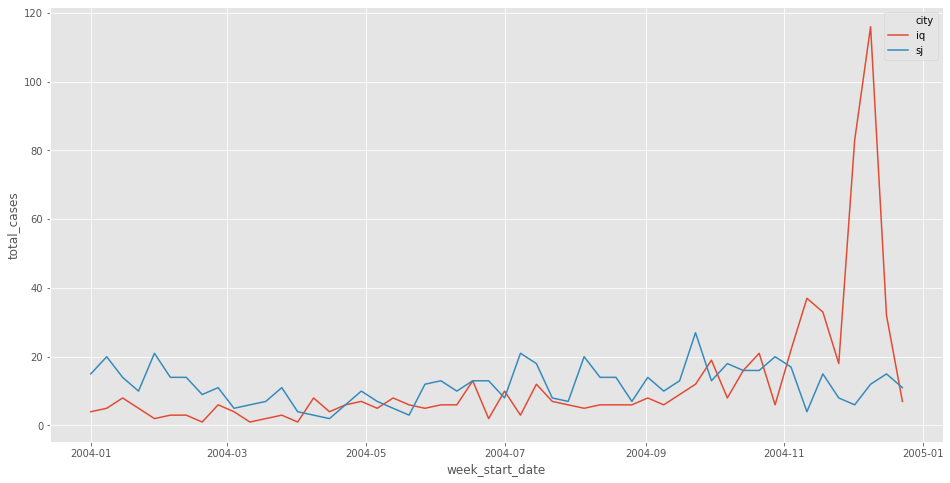

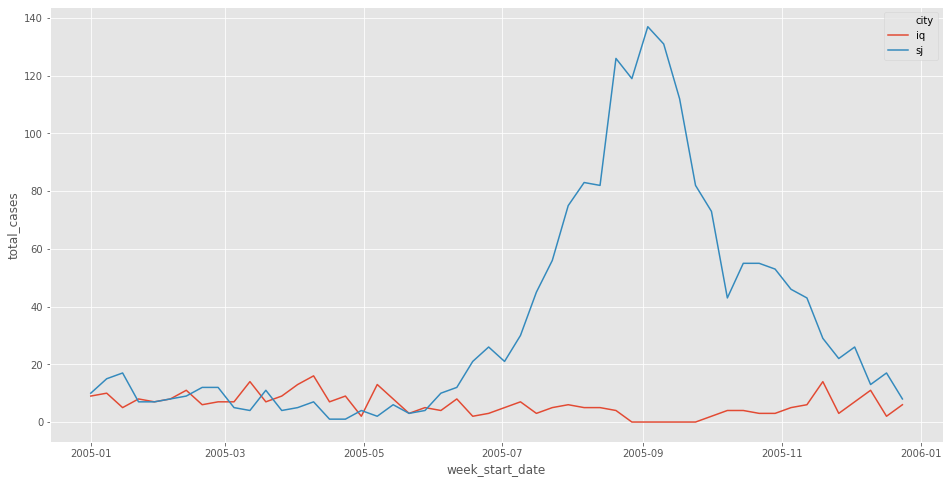

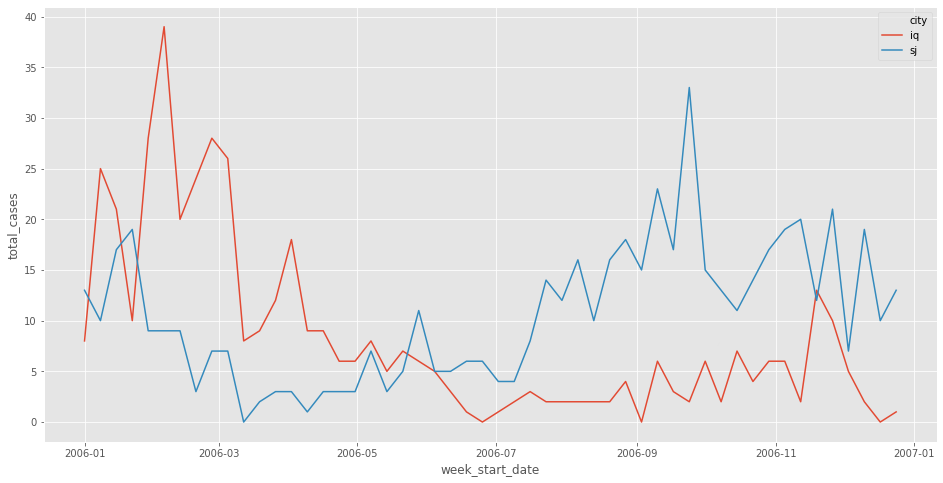

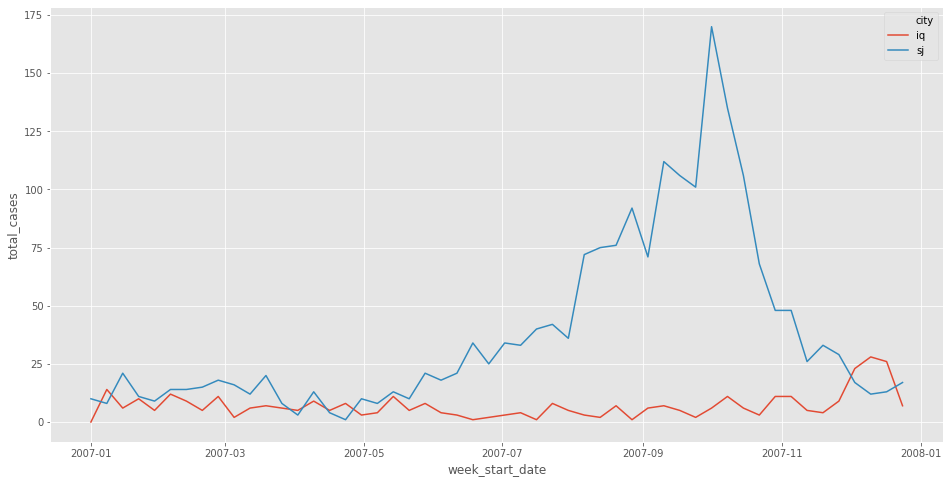

In [26]:
for i in range(1990,2008):
    fig, ax = plt.subplots(figsize=(16,8))
    sns.lineplot('week_start_date','total_cases',hue='city',
                 data=date_all_train_data.loc[str(i)], ax=ax)
    plt.plot()

In [27]:
mean_sj_cases_week = sj_train_data.groupby('weekofyear').mean()

# Mean Dengue Cases per week in San Juan 

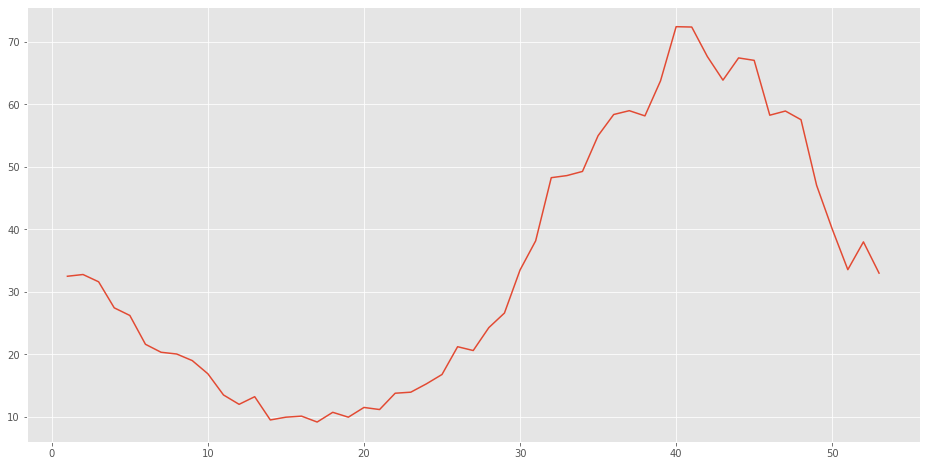

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(mean_sj_cases_week.index.values, mean_sj_cases_week.total_cases.values, ax=ax)

In [29]:
mean_iq_cases_week = iq_train_data.groupby('weekofyear').mean()

# Mean Dengue Cases per week in Iquitos

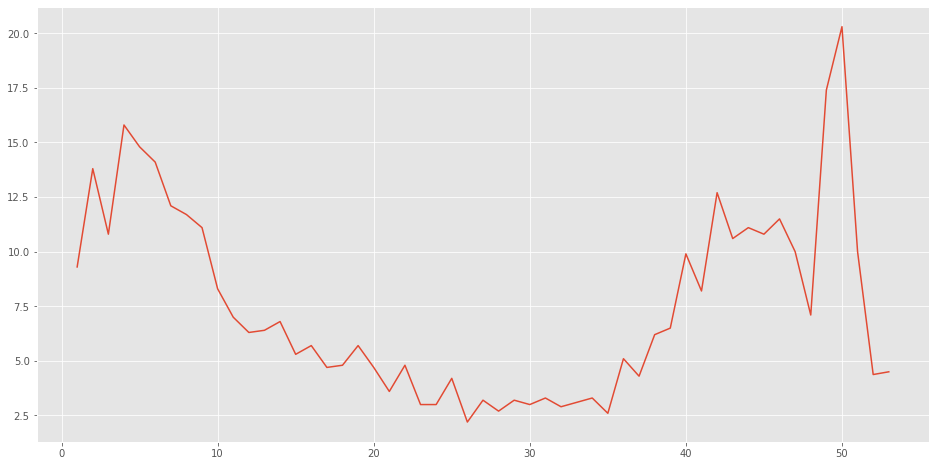

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(mean_iq_cases_week.index.values, mean_iq_cases_week.total_cases.values, ax=ax)

## Here it is easier to see that the highest peak of dengue infections in San Juan tend to be at september-december. Approaching the summer tends to be where the least cases are diagnosed.

## For Iquitos there isnt as much data for me to give an accurate estimate on which seasons get the most dengue cases. But according to the mean lineplot, the peak tends to be about December-February

# Creating a Linear Regression Machine learning algorithm

In [31]:
numeric_cols = scale_cols

X_sj = sj_train_data[numeric_cols].values
y_sj=sj_train_data[['total_cases']].values

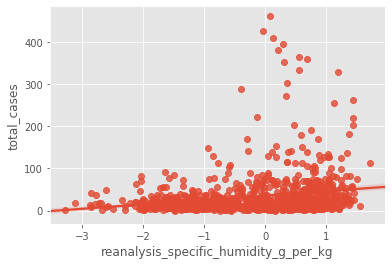

In [32]:
sns.regplot(y='total_cases',x='reanalysis_specific_humidity_g_per_kg',data=sj_train_data)

## Verifying which random state performs best

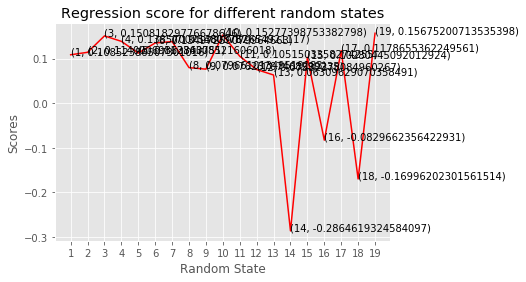

In [33]:
scores = []
for i in range(1,20):
    X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj,y_sj,test_size=0.3, 
                                                                    random_state=i)
    regressor = LinearRegression(n_jobs=12)
    regressor.fit(X_train_sj,y_train_sj)
    y_sj_pred= regressor.predict(X_test_sj)
    scores.append(regressor.score(X_test_sj,y_test_sj))

plt.plot([k for k in range(1,20)], scores, color = 'red')
for i in range(1,20):
    plt.text(i, scores[i-1], (i, scores[i-1]))
plt.xticks([i for i in range(1,20)])
plt.xlabel('Random State')
plt.ylabel('Scores')
plt.title('Regression score for different random states')
plt.show()    

In [34]:
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj,y_sj,test_size=0.3, 
                                                                random_state=10)
regressor = LinearRegression(n_jobs=12)
regressor.fit(X_train_sj,y_train_sj)
y_sj_pred= regressor.predict(X_test_sj)
print(regressor.score(X_test_sj,y_test_sj))

0.15277398753382798


In [35]:
X_iq = iq_train_data[numeric_cols].values
y_iq = iq_train_data[['total_cases']].values

X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X_iq,y_iq,test_size=0.3, 
                                                                    random_state=10)
regressor2 = LinearRegression(n_jobs=12)
regressor2.fit(X_train_iq,y_train_iq)
y_iq_pred= regressor2.predict(X_test_iq)
print(regressor2.score(X_test_iq,y_test_iq))

-0.022387666366189274


## It is easy to conclude that using Linear Regression model won't work. As seen previously in the plots, the data is not linearly corelated, specially with the Iquitos data. Hence, I must look for a deeper method of solving this issue. I wont bother using KNN nor Logistic Regression as they are used more as classifier and it does not fit this type of data.

# Attempting a Poisson Regression Model (on SJ)

In [36]:
sj_train_data_dates = date_all_train_data[date_all_train_data['city'] == 'sj']

sj_train_data_dates

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,set_type
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,1990-04-30,-0.052787,-0.193201,-0.069609,-0.284390,-0.751345,-0.830624,...,-0.751345,-1.792727,-0.655061,-1.397955,-0.511905,-1.570015,-1.341639,-0.492457,4.0,train
1990-05-07,sj,1990,19,1990-05-07,0.275463,0.115456,-0.548334,-0.543272,-0.504407,-0.370095,...,-0.504407,-0.913462,-0.727664,-0.398611,-0.752208,-0.391290,0.025756,-0.657262,5.0,train
1990-05-14,sj,1990,20,1990-05-14,-0.679794,0.362636,-0.616673,-0.363628,-0.226128,0.040980,...,-0.226128,0.040614,-0.747831,-0.398611,-0.700251,-0.135046,0.398682,0.073226,4.0,train
1990-05-21,sj,1990,21,1990-05-21,-0.010918,0.941419,0.315661,0.397224,-0.681538,0.189338,...,-0.681538,-0.072989,-0.711530,0.196504,-0.570357,0.428692,0.709453,-0.759708,3.0,train
1990-05-28,sj,1990,22,1990-05-28,0.457978,1.078957,0.628964,0.531213,-0.867691,0.572597,...,-0.867691,0.274284,-0.546158,1.353048,0.611673,1.299923,1.082379,-0.719620,6.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-25,sj,2008,13,2008-03-25,-0.363341,-1.346151,1.414396,1.103265,-0.400646,-1.273637,...,-0.400646,-2.031015,-0.582459,-1.712356,-1.018490,-1.262522,-0.657941,-0.808704,4.0,train
2008-04-01,sj,2008,14,2008-04-01,-1.167311,-1.160984,-1.117957,-1.585539,-0.955543,-0.463849,...,-0.955543,-1.372490,-0.630861,-0.769154,-0.550873,-0.955028,0.025756,-0.837656,3.0,train
2008-04-08,sj,2008,15,2008-04-08,-1.980650,-1.449305,-0.874320,-0.710215,-0.643547,-0.912015,...,-0.643547,-1.681895,-0.780099,-1.746041,-1.050963,-1.570015,-0.285016,-0.165074,1.0,train


In [37]:
#Training dataset for poisson

mask_sj = np.random.rand(len(sj_train_data_dates)) < 0.8

sj_train_poisson = sj_train_data_dates[mask_sj].copy()

sj_test_poisson = sj_train_data_dates[~mask_sj].copy()

In [38]:
len(sj_train_poisson)

746

In [39]:
len(sj_test_poisson)

190

In [40]:
#Regression expression for patsy

regression_var_cols = ['weekofyear','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm', 
                          'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
                         'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
                         'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
                         'reanalysis_sat_precip_amt_mm',
                         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
                         'station_avg_temp_c','station_diur_temp_rng_c', 'station_max_temp_c',
                         'station_min_temp_c','station_precip_mm']

expr = """total_cases ~ weekofyear + ndvi_ne + ndvi_nw + 
            ndvi_se + ndvi_sw + precipitation_amt_mm + reanalysis_air_temp_k + 
            reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k +
            reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + 
            reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg +
            reanalysis_tdtr_k + station_avg_temp_c + station_diur_temp_rng_c + station_max_temp_c 
            + station_min_temp_c + station_precip_mm"""

In [41]:
y_sj_train_poisson, X_sj_train_poisson = dmatrices(expr, 
                                                   sj_train_poisson, return_type='dataframe')

y_sj_test_poisson, X_sj_test_poisson = dmatrices(expr, 
                                                 sj_test_poisson, return_type='dataframe')

In [42]:
sj_poisson_training_result = sm.GLM(y_sj_train_poisson, X_sj_train_poisson, 
                                   family = sm.families.Poisson()).fit()

In [43]:
sj_poisson_training_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  746
Model:                            GLM   Df Residuals:                      726
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11980.
Date:                Sat, 30 Nov 2019   Deviance:                       20387.
Time:                        11:27:13   Pearson chi2:                 2.64e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.3682      0.056     42.544      0.000       2.259       2.477
weekofyear                                0.0272      0.001     49.692      0.000       0.026       0.028
ndvi_ne                                  -0.0453      0.012     -3.653      0.000      -0.070      -0.021
ndvi_nw                                   0.0899      0.012      7.707      0.000       0.067       0.113
ndvi_se                                  -0.7492      0.013    -58.510      0.000      -0.774      -0.724
ndvi_sw                                   0.7938      0.015     53.787      0.000       0.765       0.823
precipitation_amt_mm                     -0.0338      0.004     -8.211      0.000      -0.042      -0.026
reanalysis_air_temp_k                     1.2100      0.111     10.893      0.000       0.992       1.428
reanalysis_avg_temp_k                    -1.4502      0.107    -13.526      0.000      -1.660      -1.240
reanalysis_dew_point_temp_k              -0.1559      0.134     -1.162      0.245      -0.419       0.107
reanalysis_max_air_temp_k                 1.0594      0.064     16.627      0.000       0.934       1.184
reanalysis_min_air_temp_k                 0.0395      0.057      0.696      0.486      -0.072       0.151
reanalysis_precip_amt_kg_per_m2           0.0494      0.009      5.264      0.000       0.031       0.068
reanalysis_sat_precip_amt_mm             -0.0338      0.004     -8.211      0.000      -0.042      -0.026
reanalysis_specific_humidity_g_per_kg     0.1850      0.136      1.360      0.174      -0.082       0.452
reanalysis_tdtr_k                        -1.0480      0.079    -13.325      0.000      -1.202      -0.894
station_avg_temp_c                       -0.0327      0.027     -1.227      0.220      -0.085       0.020
station_diur_temp_rng_c                   0.0447      0.029      1.517      0.129      -0.013       0.102
station_max_temp_c                        0.1556      0.021      7.499      0.000       0.115       0.196
station_min_temp_c                       -0.0316      0.021     -1.483      0.138      -0.073       0.010
station_precip_mm                        -0.0722      0.014     -5.224      0.000      -0.099      -0.045
=========================================================================================================
"""

In [44]:
sj_poisson_predictions = sj_poisson_training_result.get_prediction(X_sj_test_poisson)

sj_pred_summary_frame = sj_poisson_predictions.summary_frame()

In [45]:
sj_pred_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
week_start_date,,,,
1990-05-14,29.484372,0.751228,28.048152,30.994135
1990-05-28,33.873708,1.031261,31.911595,35.956464
1990-06-11,40.059706,0.730063,38.654063,41.516464
1990-06-18,28.853107,1.106907,26.763165,31.106252
1990-06-25,64.030991,1.538090,61.086254,67.117683
...,...,...,...,...
2007-12-24,21.411212,0.732579,20.022468,22.896279
2008-01-08,4.096076,0.147056,3.817759,4.394683
2008-02-05,18.408615,0.794305,16.915818,20.033150


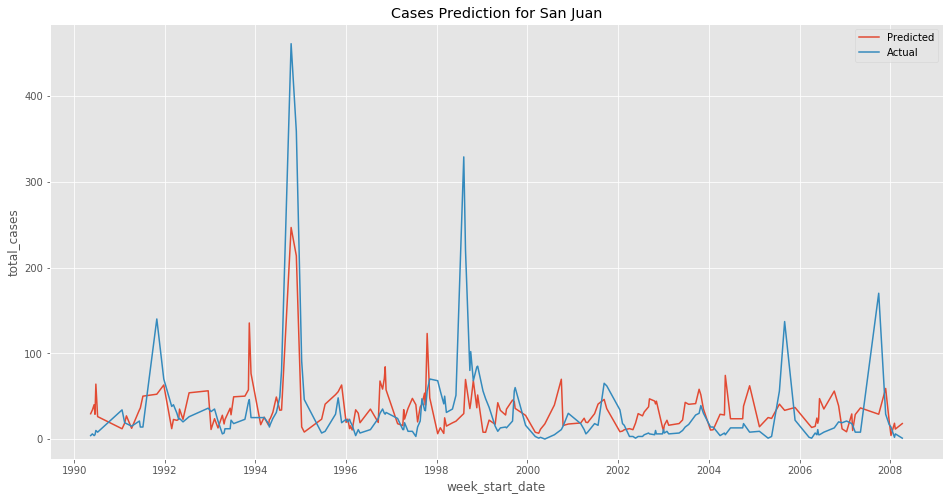

In [46]:
sj_predicted_counts = sj_pred_summary_frame['mean']

sj_actual_counts = y_sj_test_poisson['total_cases']

fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(X_sj_test_poisson.index, sj_predicted_counts, ax=ax, label='Predicted')
sns.lineplot(X_sj_test_poisson.index, sj_actual_counts,ax=ax, label='Actual')
plt.title('Cases Prediction for San Juan')
plt.legend()
plt.show()

#### This seems to work much better than the LinearRegression model. Nonetheless, it is not the most accurate.

[Pearson Chi Squared Table](https://www.medcalc.org/manual/chi-square-table.php)

[Pearson Chi Squared Info](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)

[Pearson Chi Squared Calculator](https://www.danielsoper.com/statcalc/calculator.aspx?id=12)

#### To make a determination of the accuracy using p=0.05 (for a 95% confidence level) I used the Pearson Chi Squared calculator shown above and use DF Residuals=739. The chi squared value is 803 which is smaller than what we got (28,800). What this means is that my fit is not as accurate as I would wish.

Note: These values change whenever I rerun the script

# Attempting a Negative Binomial Model (for SJ)

#### Since I already have a poisson model of the San Juan data, I can easily create a Negative Binomial Model

In [47]:
sj_poisson_training_result.mu

array([ 15.1542507 ,  24.55061227,  33.35475052,  23.46460773,
        71.07576942,  31.31082978,  37.70307301,  61.94714471,
        37.15257158,  46.24079906,  53.43203511,  64.92768298,
        31.26495125,  77.98935932,  82.27339872,  78.20019778,
        55.88323546,  41.05960504,  57.56903417,  47.99514962,
        48.48389096,  81.65506589, 106.74649814,  61.75283527,
        49.38709372,  42.17084675,  68.62878664,  83.72142493,
        46.54412131,  14.63704675,   3.52861198,   8.8213853 ,
         9.03087074,   9.85313938,  26.27216174,  14.54079697,
        28.15740808,  29.02206725,  25.74860044,  13.11276221,
        24.74564953,  31.21443724,  21.22309356,  29.35983431,
        12.7448482 ,  57.43756731,  53.58383369,  39.09597976,
        42.69192197,  57.50588574,  48.34928806,  32.31393717,
        28.61929226,  54.01710515,  48.15672166,  66.05563664,
        30.23916739,  75.87650359,  65.41101757,  65.03607513,
       104.35227591,  75.09596827,  74.15678801,  74.71

In [48]:
len(sj_poisson_training_result.mu)

746

In [49]:
sj_train_poisson['cases_lambda'] = sj_poisson_training_result.mu

In [50]:
sj_train_poisson.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,set_type,cases_lambda
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,1990-04-30,-0.052787,-0.193201,-0.069609,-0.284390,-0.751345,-0.830624,...,-1.792727,-0.655061,-1.397955,-0.511905,-1.570015,-1.341639,-0.492457,4.0,train,15.154251
1990-05-07,sj,1990,19,1990-05-07,0.275463,0.115456,-0.548334,-0.543272,-0.504407,-0.370095,...,-0.913462,-0.727664,-0.398611,-0.752208,-0.391290,0.025756,-0.657262,5.0,train,24.550612
1990-05-21,sj,1990,21,1990-05-21,-0.010918,0.941419,0.315661,0.397224,-0.681538,0.189338,...,-0.072989,-0.711530,0.196504,-0.570357,0.428692,0.709453,-0.759708,3.0,train,33.354751
1990-06-04,sj,1990,23,1990-06-04,0.457978,0.377755,0.670233,-0.236123,-0.818778,0.652958,...,0.276131,-0.804299,0.701790,-0.492421,0.992430,1.082379,0.022003,2.0,train,23.464608
1990-07-02,sj,1990,27,1990-07-02,-0.192623,-0.050111,-0.570514,0.007468,-0.704094,1.031065,...,0.831213,-0.828500,0.870219,-0.687261,0.736185,1.393150,-0.824294,6.0,train,71.075769


In [51]:
sj_train_poisson['aux_ols_dep'] = sj_train_poisson.apply(lambda x: 
                                                         ((x['total_cases']-x['cases_lambda'])**2 -
                                                         x['total_cases'])/x['cases_lambda'],axis=1)

In [52]:
sj_train_poisson.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,set_type,cases_lambda,aux_ols_dep
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,1990-04-30,-0.052787,-0.193201,-0.069609,-0.284390,-0.751345,-0.830624,...,-0.655061,-1.397955,-0.511905,-1.570015,-1.341639,-0.492457,4.0,train,15.154251,7.946108
1990-05-07,sj,1990,19,1990-05-07,0.275463,0.115456,-0.548334,-0.543272,-0.504407,-0.370095,...,-0.727664,-0.398611,-0.752208,-0.391290,0.025756,-0.657262,5.0,train,24.550612,15.365256
1990-05-21,sj,1990,21,1990-05-21,-0.010918,0.941419,0.315661,0.397224,-0.681538,0.189338,...,-0.711530,0.196504,-0.570357,0.428692,0.709453,-0.759708,3.0,train,33.354751,27.534635
1990-06-04,sj,1990,23,1990-06-04,0.457978,0.377755,0.670233,-0.236123,-0.818778,0.652958,...,-0.804299,0.701790,-0.492421,0.992430,1.082379,0.022003,2.0,train,23.464608,19.549842
1990-07-02,sj,1990,27,1990-07-02,-0.192623,-0.050111,-0.570514,0.007468,-0.704094,1.031065,...,-0.828500,0.870219,-0.687261,0.736185,1.393150,-0.824294,6.0,train,71.075769,59.497854


In [53]:
ols_expr = """aux_ols_dep ~ cases_lambda - 1"""

sj_aux_oslr_results = smf.ols(ols_expr, sj_train_poisson).fit()

In [54]:
sj_aux_oslr_results.params

cases_lambda    0.842773
dtype: float64

In [55]:
sj_aux_oslr_results.tvalues

cases_lambda    10.028513
dtype: float64

[Tvalue Calculator](https://goodcalculators.com/student-t-value-calculator/)

#### Using the t-value calculator of aroundDF Residual = 750 and the coefficient a = 0.885, it tells me that the critical tvalue at 99% confidence level is -1.2. This is much less than the t-value seen above of 7.17 thus a=0.885 should be statistically significant.

In [56]:
sj_nb2_training_results = sm.GLM(y_sj_train_poisson, X_sj_train_poisson, 
                                family=
                                 sm.families.NegativeBinomial(alpha=
                                                              sj_aux_oslr_results.params[0])).fit()

In [57]:
sj_nb2_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  746
Model:                            GLM   Df Residuals:                      726
Model Family:        NegativeBinomial   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3278.9
Date:                Sat, 30 Nov 2019   Deviance:                       747.16
Time:                        11:27:14   Pearson chi2:                     921.
No. Iterations:                    38                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 2.5113      0.292      8.604      0.000       1.939       3.083
weekofyear                                0.0186      0.003      6.301      0.000       0.013       0.024
ndvi_ne                                  -0.0262      0.062     -0.426      0.670      -0.147       0.094
ndvi_nw                                   0.1516      0.062      2.457      0.014       0.031       0.272
ndvi_se                                  -0.4537      0.078     -5.829      0.000      -0.606      -0.301
ndvi_sw                                   0.4673      0.089      5.239      0.000       0.292       0.642
precipitation_amt_mm                     -0.0229      0.023     -1.008      0.313      -0.067       0.022
reanalysis_air_temp_k                     0.9394      0.611      1.538      0.124      -0.257       2.136
reanalysis_avg_temp_k                    -1.0073      0.587     -1.717      0.086      -2.157       0.143
reanalysis_dew_point_temp_k              -0.9202      0.686     -1.342      0.180      -2.264       0.424
reanalysis_max_air_temp_k                 1.1250      0.371      3.033      0.002       0.398       1.852
reanalysis_min_air_temp_k                -0.1486      0.302     -0.492      0.622      -0.740       0.443
reanalysis_precip_amt_kg_per_m2           0.0334      0.058      0.576      0.564      -0.080       0.147
reanalysis_sat_precip_amt_mm             -0.0229      0.023     -1.008      0.313      -0.067       0.022
reanalysis_specific_humidity_g_per_kg     1.1690      0.718      1.629      0.103      -0.237       2.575
reanalysis_tdtr_k                        -1.7419      0.437     -3.989      0.000      -2.598      -0.886
station_avg_temp_c                       -0.2053      0.148     -1.388      0.165      -0.495       0.085
station_diur_temp_rng_c                   0.3060      0.161      1.904      0.057      -0.009       0.621
station_max_temp_c                        0.0059      0.116      0.051      0.960      -0.221       0.233
station_min_temp_c                       -0.0382      0.119     -0.321      0.748      -0.272       0.195
station_precip_mm                        -0.1488      0.075     -1.995      0.046      -0.295      -0.003
=========================================================================================================
"""

In [58]:
sj_nb2_pred = sj_nb2_training_results.get_prediction(X_sj_test_poisson)

In [59]:
sj_nb2_pred_summary_frame = sj_nb2_pred.summary_frame()
sj_nb2_pred_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
week_start_date,,,,
1990-05-14,29.002937,4.010605,22.117475,38.031936
1990-05-28,34.591706,5.504709,25.323111,47.252730
1990-06-11,39.934147,3.971001,32.862606,48.527377
1990-06-18,35.294283,7.596453,23.147213,53.815827
1990-06-25,67.765468,9.563683,51.390055,89.358897
...,...,...,...,...
2007-12-24,26.878049,5.068088,18.573610,38.895480
2008-01-08,6.473014,1.169697,4.542463,9.224051
2008-02-05,18.854998,3.840608,12.648637,28.106659


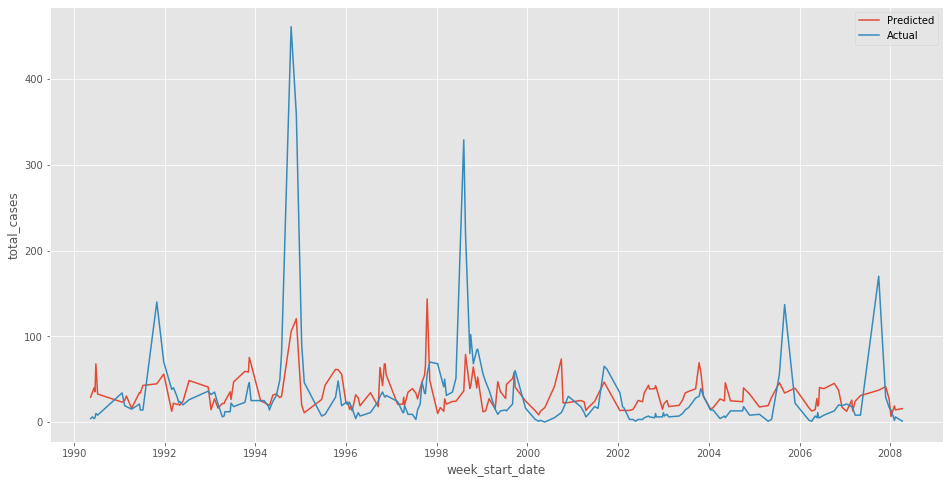

In [60]:
sj_nb2_predicted_counts=sj_nb2_pred_summary_frame['mean']

fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(X_sj_test_poisson.index,sj_nb2_predicted_counts, label='Predicted')
sns.lineplot(X_sj_test_poisson.index,sj_actual_counts, label='Actual')

plt.legend()
plt.show()

#### The plot seems to only show a slighly better fit, yet not much. To make sure of this I did the same steps as before:

[Pearson Chi Squared Calculator](https://www.danielsoper.com/statcalc/calculator.aspx?id=12)

#### The reported DF residual is 739 and the pearson chi squared is 972. Using the calculator for a 95% confidence interval (p=0.05), the result was 803.35. This is still smaller than the reported 972 and so this model is still not the best to fit our data/predict well.

# Verifying accuracy of other models

In [61]:
models = {'ExtraTreesRegressor': ExtraTreesRegressor(),
         'RandomForestRegressor': RandomForestRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'SVR': SVR()}
params = {'ExtraTreesRegressor': {'n_estimators':[1000], 'max_depth':[2,5,10,20],
                                  'max_features':['sqrt', 10, 20]},
         'RandomForestRegressor': {'n_estimators':[1000], 'max_depth':[2,5,10,20],
                                  'max_features':['sqrt', 10, 20]},
         'AdaBoostRegressor': {'n_estimators':[1000]},
         'GradientBoostingRegressor': {'n_estimators': [1000],
                                       'max_features': ['sqrt',10, 20],
                                       'max_depth': [2,5,10,10]},
         'SVR': [{'kernel': ['linear'], 'C':[0.05,0.01], 'degree':[1],'epsilon':[0.2,0.5,1]}]}

In [62]:
sj_data_helper = EstimatorSelectionHelper(models, params)
sj_data_helper.fit(X_train_sj, y_train_sj, scoring='neg_mean_absolute_error', cv=2)

Running GridSearchCV for ExtraTreesRegressor.


C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

Running GridSearchCV for RandomForestRegressor.


C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was pa

Running GridSearchCV for AdaBoostRegressor.


C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Running GridSearchCV for GradientBoostingRegressor.


C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Running GridSearchCV for SVR.
Done.


C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HGSM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [64]:
sj_data_helper.score_summary()

,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,mean_test_score,std_test_score
0,SVR,0.000000,0.000000e+00,0.000000,0.000000e+00,"{'C': 0.01, 'degree': 1, 'epsilon': 1, 'kernel...",-25.057598,-23.003100,-24.031917,1.027248
1,SVR,0.000000,0.000000e+00,0.007813,7.812977e-03,"{'C': 0.05, 'degree': 1, 'epsilon': 0.5, 'kern...",-25.013026,-23.061968,-24.038987,0.975528
2,SVR,0.000000,0.000000e+00,0.000000,0.000000e+00,"{'C': 0.05, 'degree': 1, 'epsilon': 1, 'kernel...",-24.989705,-23.092732,-24.042666,0.948486
3,SVR,0.007813,7.813215e-03,0.000000,0.000000e+00,"{'C': 0.01, 'degree': 1, 'epsilon': 0.5, 'kern...",-25.092618,-23.007516,-24.051658,1.042550
4,SVR,0.000000,0.000000e+00,0.000000,0.000000e+00,"{'C': 0.05, 'degree': 1, 'epsilon': 0.2, 'kern...",-25.056765,-23.044863,-24.052350,1.005950
5,SVR,0.007813,7.812977e-03,0.000000,0.000000e+00,"{'C': 0.01, 'degree': 1, 'epsilon': 0.2, 'kern...",-25.120540,-22.996535,-24.060159,1.062002
6,ExtraTreesRegressor,0.618140,4.009485e-03,0.047011,1.000404e-03,"{'max_depth': 5, 'max_features': 20, 'n_estima...",-27.369950,-25.898873,-26.635534,0.735538
7,ExtraTreesRegressor,0.766452,7.808208e-03,0.070326,7.812738e-03,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",-27.234767,-26.234558,-26.735426,0.500104
8,ExtraTreesRegressor,0.526298,3.821015e-03,0.049007,2.005100e-03,"{'max_depth': 5, 'max_features': 10, 'n_estima...",-27.040302,-26.478182,-26.759671,0.281060
9,RandomForestRegressor,0.961297,5.171299e-04,0.039070,7.817388e-03,"{'max_depth': 5, 'max_features': 10, 'n_estima...",-28.037625,-25.509996,-26.775740,1.263813
